Привет! <br>
Меня зовут Сергей Дроздов, и я буду проверять твой проект. Предлагаю общаться на «ты». Если тебе удобнее общаться на "Вы", просто дай знать. 

Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Так будут выделены комментарии с указаниями, обязательными к выполнению. Без их выполнения проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:
&#9888;</b> Так будут выделены некритичные замечания. Их отработка позволит улучшить качество твоего проекта.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Так будут выделены остальные комментарии, полезные лайфхаки и ссылки на сторонние ресурсы </div>

Для наиболее эффективной и оперативной работы над проектом, мне хотелось бы иметь обратную связь. Не стесняйся задавать вопросы. Если ты что-либо меняешь в проекте, пожалуйста, комментируй это. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

# Прогнозирование оттока клиентов. Оператор связи «Ниединогоразрыва.ком»

## Описание проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

## Цель исследования
- провести исследовательский анализ данных
- обучить модель, которая будет прогнозировать отток клиентов оператора связи.
- составить отчет по проделанной работе

## Задача
- провести исследовательский анализ данных
- написать вывод
- написать вопросы
- написать план выполнения работы

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Добавь, пожалуйста, название проекта и цель исследования </div>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt


In [ ]:
def check_uniques(data):
    for i in data.columns:
        print(i)
        print(data[i].unique())
        print('---')

In [ ]:
try:
    df_contract = pd.read_csv(
        '/home/qq/Downloads/final_project/final_provider/contract.csv', parse_dates=['BeginDate'])
    df_internet = pd.read_csv(
        '/home/qq/Downloads/final_project/final_provider/internet.csv')
    df_personal = pd.read_csv(
        '/home/qq/Downloads/final_project/final_provider/personal.csv')
    df_phone = pd.read_csv(
        '/home/qq/Downloads/final_project/final_provider/phone.csv')
except:
    
    df_contract = pd.read_csv(
        '/datasets/final_provider/contract.csv', parse_dates=['BeginDate'])
    df_internet = pd.read_csv(
        '/datasets/final_provider/internet.csv')
    df_personal = pd.read_csv(
        '/datasets/final_provider/personal.csv')
    df_phone = pd.read_csv(
        '/datasets/final_provider/phone.csv')


<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Отлично, данные на базе! </div>

# анализ df_contract

In [ ]:
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [ ]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB


в данной таблице имеется 2 временных признака, 3 категориальных признака, и 2 непрерывных.

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Хорошо! </div>

In [ ]:
check_uniques(df_contract)

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
---
BeginDate
['2020-01-01T00:00:00.000000000' '2017-04-01T00:00:00.000000000'
 '2019-10-01T00:00:00.000000000' '2016-05-01T00:00:00.000000000'
 '2019-09-01T00:00:00.000000000' '2019-03-01T00:00:00.000000000'
 '2018-04-01T00:00:00.000000000' '2019-04-01T00:00:00.000000000'
 '2017-07-01T00:00:00.000000000' '2014-12-01T00:00:00.000000000'
 '2019-01-01T00:00:00.000000000' '2018-10-01T00:00:00.000000000'
 '2015-04-01T00:00:00.000000000' '2015-09-01T00:00:00.000000000'
 '2018-01-01T00:00:00.000000000' '2014-05-01T00:00:00.000000000'
 '2015-10-01T00:00:00.000000000' '2014-03-01T00:00:00.000000000'
 '2018-05-01T00:00:00.000000000' '2019-11-01T00:00:00.000000000'
 '2019-02-01T00:00:00.000000000' '2016-01-01T00:00:00.000000000'
 '2017-08-01T00:00:00.000000000' '2015-12-01T00:00:00.000000000'
 '2014-02-01T00:00:00.000000000' '2018-06-01T00:00:00.000000000'
 '2019-12-01T00:00:00.000000000' '2017-11-01T

1. столбцы `BeginDate` и `EndDate` являются данными типа datetime, но записаны как object
    - поэтому загрузим df_conrtact изначально с изменением формата `BeginDate`
    - в столбце `EndDate` имеются значения "No", что не позволяет изменить тип данных
        - все зависит от того, как будет выглядеть решение задачи
        - если целевой признак `EndDate` и мы кодируем его в зависимости ушел пользователь или нет ([0,1]), тогда мы будем его кодировать
2. столбец `TotalCharges` имеет тип данных object, но содержит в себе только значения типа float, поэтому переведем его в нужный тип данных

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Ок, у нас стоит задача бинарной классификации(ушел пользователь или нет) </div>

## BeginDate

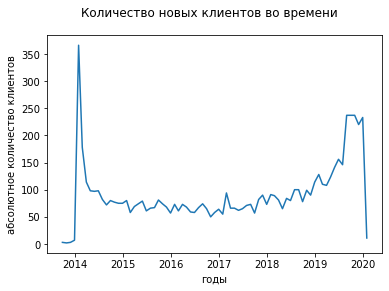

In [ ]:
i = df_contract.groupby('BeginDate')['customerID'].count()

fig, ax = plt.subplots()

ax.plot(i.index, i)

fig.suptitle('Количество новых клиентов во времени')
plt.xlabel('годы')
plt.ylabel('абсолютное количество клиентов')
# plt.xticks(i.index)
plt.show()


странные пики в начале и в конце временного промежутка, наверное стоило бы отфильтровать их

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Не стоит, в данном случае аномалий не будет, возможно это были разовые акции. Оставляй как есть </div>

не совсем уверен как лучше сделать, убрать именно эти выпадающие дни или взять промежуток времени, который находится между этими выпадающими значениями?

UPD:в итоге подумал, что стоит все же взять и провести сплит данных, а не фильтр тех выпадающих значений, то есть уменьшить окно временных данных.

непосредственно фильтр выполню это в конце тетради

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- понял, не выполню
</div>

## EndDate

In [ ]:
print(f'''
{round(df_contract['EndDate'].where(lambda x: x == 'No').dropna().shape[0] / df_contract['EndDate'].shape[0] * 100)}% пользователей не завершили пользоваться услугами оператора
так как изначально было не много данных ({df_contract.shape[0]}), большой дисбаланс классов возникает, или предполагается что upsampling решит данную проблему достаточно?
''')



73% пользователей не завершили пользоваться услугами оператора
так как изначально было не много данных (7043), большой дисбаланс классов возникает, или предполагается что upsampling решит данную проблему достаточно?



<div class="alert alert-warning">
<b>Комментарий ревьюера:
&#9888;</b> Upsempling в данном случае не нужен, так как он не повлияет на roc-auc. Лучше используй весовые коэффициенты при кроссвалидации <a href = "https://alexanderdyakonov.wordpress.com/2021/05/27/imbalance/">Тык</a> </div>

<AxesSubplot:title={'center':'Количество ушедших клиентов во времени'}, xlabel='годы', ylabel='абсолютное количество клиентов'>

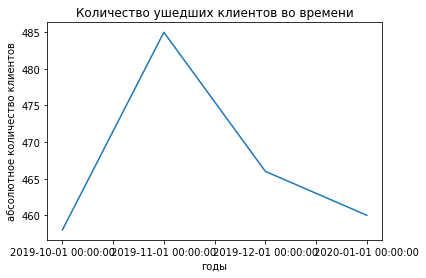

In [ ]:
df_contract.query('EndDate != "No"').groupby('EndDate')['customerID'].count().plot(title='Количество ушедших клиентов во времени',
                                                                                   ylabel='абсолютное количество клиентов',
                                                                                   xlabel='годы')


первые ушедшие пользователи появились под конец 2019 года, степень отмены контрактов достигла максимума в октябре 2019 года, после чего видим снижение данного показателя

данный график кажется странным, так как учитывая то, что первые пользователи у данного оператора появились в 2014 году, а впервые пользователи начали уходить спустя почти 6 лет, выглядит сомнительно.

## TotalCharges

In [ ]:
df_contract.query('TotalCharges == " "')


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


в целом не понятная система, если они оплатили сразу за два года, то почему у них нет параметра `TotalCharges`?

то есть контракт на два года, но оплата помесячная?
или предполагается, что мы сами посчитаем на 24 месяца?

In [ ]:
print(
    f'''
    так как данные клиенты составляют лишь {round(df_contract.query('TotalCharges == " "').shape[0] / df_contract.shape[0] * 100, 2)}% от общего количества пользователей
    {round(df_contract.query('TotalCharges == " " and Type == "Two year"').shape[0] / df_contract.query('Type == "Two year"').shape[0], 2)}% от пользователей, которые подписали контракт сразу на два года
    {round(df_contract.query('TotalCharges == " " and PaperlessBilling == "No"').shape[0] / df_contract.query('PaperlessBilling == "No"').shape[0], 3)}% от пользователей, которые отказались от бумажного счета
    можно их убрать из общего пула данных
    '''
)



    так как данные клиенты составляют лишь 0.16% от общего количества пользователей
    0.01% от пользователей, которые подписали контракт сразу на два года
    0.003% от пользователей, которые отказались от бумажного счета
    можно их убрать из общего пула данных
    


In [ ]:
df_contract = df_contract.query('TotalCharges != " "')

In [ ]:
# и успешно меняем тип данных в столбце TotalCharges
# и честно сказать, я не понимаю, как такую конструкцию переделать так, чтобы он не ругался, что я записываю на копию
df_contract['TotalCharges'] = df_contract.loc[:,
                                              'TotalCharges'].astype('float')

<div class="alert alert-warning">
<b>Комментарий ревьюера:
&#9888;</b>  Ты можешь заметить, что эти пропуски приходятся на дату выгрузки из бд (это новое подключение). Т.к. таких данных мало, можно их смело удалить или заменить значения на monthlycharges </div>

## Type

In [ ]:
df_contract['Type'].value_counts(normalize=True)

Month-to-month    0.551052
Two year          0.239619
One year          0.209329
Name: Type, dtype: float64

по параметру типа оплаты, клиенты распределены почти равномерно
- между ежемесячной оплатой и долгосрочной: 55% и 45% соответственно
- между долгосрочными, а то есть ежегодной и каждые 2 года: 21% и 24% соответственно

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Хорошо! </div>

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Здесь и далее: давай будем кодировать данные после объединения таблиц </div>

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- понял
</div>

## PaperlessBilling

In [ ]:
df_contract['PaperlessBilling'].value_counts(normalize=True)


Yes    0.592719
No     0.407281
Name: PaperlessBilling, dtype: float64

наблюдается сдвиг в сторону бумажного счета

данный параметр можно трансформировать в формат [0,1], для меньшего потребления памяти, что ускорит вычисления

и в целом предполагаю, что необходимо будет произвести label encoding признаков

данный параметр остался с типом object, хотя содержит значения 0 и 1

изменим это

<div class="alert alert-warning">
<b>Комментарий ревьюера:
&#9888;</b> Все преобразования идут во второй части проекта, на данном этапе идет только анализ и план работы </div>

## PaymentMethod

In [ ]:
df_contract['PaymentMethod'].value_counts(normalize=True)


Electronic check             0.336320
Mailed check                 0.228100
Bank transfer (automatic)    0.219283
Credit card (automatic)      0.216297
Name: PaymentMethod, dtype: float64

распределение класснов параметра `PaymentMethod`, так же, почти равномерно распределены, с небольшим сдвигом в сторону Electronic check

## MonthlyCharges

In [ ]:
df_contract['MonthlyCharges'].describe()


count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>
    
- средняя цена за месяц составляет 65
    - и скорее всего пик у 25 перетянул ее в меньшую сторону от медианы
- медианная цена за месяц составляет 70
- аномалий в данных не наблюдается
    - максимальные и минимальные значения выглядят реалистично.
        - около минимальных и максимальных значений достаточно клиентов с схожими ценами за месяц
</div>

<AxesSubplot:ylabel='Density'>

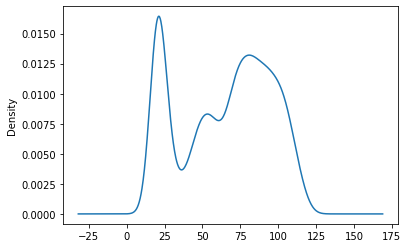

In [ ]:
df_contract['MonthlyCharges'].plot(kind='kde')


наибольший пик наблюдается на стоимости 25 за месяц, второй пик на уровне 80 за месяц


<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Здесь и далее: хорошо, давай только добавим еще выводы по описательной статистике, раз ты ее используешь </div>

## TotalCharges

In [ ]:
df_contract['TotalCharges'].describe()


count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- медиана находится прямо на пике
- когда среднее значение сдвинулось в сторону больших значений, так как видим достаточное количество клиентов с большими общими чеками 
</div>

<AxesSubplot:ylabel='Density'>

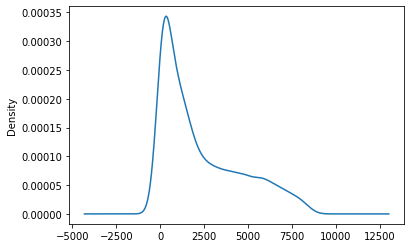

In [ ]:
df_contract['TotalCharges'].plot(kind='kde')


основная масса клиентов потратила около 1300

# df_internet

In [ ]:
df_internet.head()


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [ ]:
df_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [ ]:
df_internet.describe()


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7563-BIUPC,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


интересно, что около половины пользователей в каждой дополнительной услуге пользуется ею.

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Может все таки большая половина не пользуется?)
</div>

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- большая половина не пользуется, но меньшая, как мне показалось, около половины, пользуется.
- в этом случае мне показалось интересным, что каждая дополнительная услуга пользуется спросом.
    - и нет большого дропа в клинетах
</div>

In [ ]:
# у большинства признаков, наибольший класс чуть больше 50%
# значит второй класс находится около половины
df_internet.describe().iloc[3] / df_internet.describe().iloc[0] * 100

customerID           0.018126
InternetService     56.117455
OnlineSecurity      63.404024
OnlineBackup        55.972449
DeviceProtection    56.099329
TechSupport         62.950879
StreamingTV         50.933478
StreamingMovies     50.480334
dtype: object

In [ ]:
check_uniques(df_internet)


customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
---
InternetService
['DSL' 'Fiber optic']
---
OnlineSecurity
['No' 'Yes']
---
OnlineBackup
['Yes' 'No']
---
DeviceProtection
['No' 'Yes']
---
TechSupport
['No' 'Yes']
---
StreamingTV
['No' 'Yes']
---
StreamingMovies
['No' 'Yes']
---


здесь так же можно каждый параметр кодировать OHE 

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Согласен! </div>

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Здесь и далее: при кодирование OHE у тебя тут будет утечка данных. Попробуй использовать OHE из библиотеки sklearn, fit_transform на обучающей выборке, transform на тестовой. Самое лучшее при работе с признаками - использовать пайплайны. </div>

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- хорошо, понял
</div>

In [ ]:
df_internet.shape[0] / df_contract.shape[0] * 100


78.45563139931741

данная таблица содержит данные не для каждого клиента, здесь потеряно 22% клиентов,
что уже неприятная потеря. Возможно из за того, что данные услуги были добавлены в процессе развития компании?

и в теории можем попробовать все NaN заменить 0 и посмотреть какая метрика получится у модели

либо использовать библиотеку, где модель может принять данные с потерянными значениями

# df_personal

In [ ]:
df_personal.head()


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [ ]:
df_personal.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [ ]:
df_personal.describe(include='all')


,customerID,gender,SeniorCitizen,Partner,Dependents
count,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2
top,2616-FLVQC,Male,NaN,No,No
freq,1,3555,NaN,3641,4933
mean,NaN,NaN,0.162147,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN


In [ ]:
check_uniques(df_personal)


customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
---
gender
['Female' 'Male']
---
SeniorCitizen
[0 1]
---
Partner
['Yes' 'No']
---
Dependents
['No' 'Yes']
---


In [ ]:
for i in df_personal.columns:
    display(df_personal[i].value_counts(normalize=True))

2616-FLVQC    0.000142
2408-PSJVE    0.000142
7136-RVDTZ    0.000142
7963-SHNDT    0.000142
2332-TODQS    0.000142
                ...   
6869-FGJJC    0.000142
3351-NGXYI    0.000142
2888-ADFAO    0.000142
0562-KBDVM    0.000142
2122-YWVYA    0.000142
Name: customerID, Length: 7043, dtype: float64

Male      0.504756
Female    0.495244
Name: gender, dtype: float64

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

No     0.516967
Yes    0.483033
Name: Partner, dtype: float64

No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64

почти все параметры распределены равномерно

помимо `Dependents` у которого сдвиг в сторону "No"
И `SeniorCitizen` у которого сдив в сторону более молодых клиентов

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- так же не многие имеют иждивенцев, всего 30%
</div>

данные параметры все относятся к категориальным, помимо `customerID`, и их можно закодировать.

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- убираю, так как это выполняется в следующей части проекта
</div>

# df_phone

In [ ]:
df_phone.head()


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [ ]:
df_phone.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [ ]:
640 / 7000 * 100


9.142857142857142

- если в остальных таблицах было около 7000 пользователей, то здесь на 640 меньше (10%)
- услуга MultiLines выходила позже остальных, поэтому не всем предлагалось?
- тут зависит от того, какую библиотеку мы будем использовать для обучения модели, у некоторых есть возможность принять на вход данные с пропусками.

In [ ]:
df_phone.describe(include='all')


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,2616-FLVQC,No
freq,1,3390


In [ ]:
check_uniques(df_phone)


customerID
['5575-GNVDE' '3668-QPYBK' '9237-HQITU' ... '2234-XADUH' '8361-LTMKD'
 '3186-AJIEK']
---
MultipleLines
['No' 'Yes']
---


имеется только один параметр `MultiLines`
у которого только два значения: No и Yes
так же можем привести к формату [0,1]

данный параметр распределен равномерно

<div class="alert alert-warning">
<b>Комментарий ревьюера:
&#9888;</b> Почему бы и тут не использовать OHE. Так же в данной части работы это не требуется</div>

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- решил добавить немного разнообразия
</div>

# Объединение данных в общую структуру

In [ ]:
df_all = df_contract.copy()


In [ ]:
df_all = df_all.merge(df_internet, on='customerID', how='left')
df_all = df_all.merge(df_personal, on='customerID', how='left')
df_all = df_all.merge(df_phone, on='customerID', how='left')


In [ ]:
i = df_all.drop(columns=['customerID', 'BeginDate', 'EndDate'])


<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> У тебя почти 3 тысячи строк исчезли, проверь объединение таблиц </div>

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- если этот комментарий относительно цифр которые были под заголовком UPD
- то это из за того, что я отфильтровал, как мне показалось, странные пики на графике
- фильтровал я обрезав временной отрезок так, чтобы эти пики не входили в него
- поэтому количество информации значительно изменилось
</div>

In [ ]:
df_all.shape[0]

7032

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- вроде потерялось только около 10 клиентов
- которые попали на момент, когда данные экспортировали из системы
</div>

для того, чтобы проверить признаки на наличие проблемы мультиколлинеарности, нам необходимо вычесть VIF (Variance Inflation Factor)

<div class="alert alert-info">
<b>Комментарий студента после ревью 1:</b>

- так как отключили все OHE, то данный код не сработает, поэтому сразу же отключу
</div>

так как у признака `MonthlyCharges` VIF больше 10, это обозначате, что в данных имеется проблема мультиколлинеарности

мы можем либо удалить данный признак, либо оставить

в случае, если целью нашего построения модели является получения рабочей модели, то мы можем и оставиь ее,
если же мы хотим после успешного обучения модели посмотреть какие параметры она связала (интерпретация модели), то нам необходимо удалить данный параметр

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Молодец, что знаешь про VIF! Так же можно посмотреть ковариационную матрицу. </div>

# Выводы
- все таблицы были просмотрены
- основные проблемы:
    - не соответствие типа данных
    - временные данные вызывают сомнения
        - данные время оформления контракта имеют два сильных пика
        - данные отмены контракта содержат данные только за конец 2019 года
    - имеется проблема мультиколлинеарности
    - потеря данных в двух таблицах:
        - df_internet -- 22% по отношению к df_contract
        - df_phone -- 9.1% по отношению к df_contract
- проведена кодировка данных

# UPD

фильтр данных

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Как я писал выше, аномали в данных нет, поэтому фильтровать ничего не надо </div>

проверим как данный фильтр повлиял на распределение классов

данный фильтр не сильно изменил распределение классов в признаках, как и на VIF

# Вопросы

- предполагается, что мы приводим столбец EndDate к формату [0,1]?
    - в данном случае предполагается задача классификации?
- предполагается, что мы будем использовать `Binary Cross-Entropy Loss` как фунцию потерь?
- какие ресурсы есть у компании, чтобы обучить и поддерживать модель?
    - для того, чтобы выбрать тип модели для обучения
- если имеет значение:
    - дополнительные услуги входят в стоимость указанную в признаке `MonthlyCharges`? или мы должны это дополнительно рассчитывать
    - что обозначает признак `MultipleLines`

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> 1. У нас задача бинарной классификации
<br>2. Главной метрикой у нас будет roc-auc
<br>3. Лучше всегда начинать с простых моделей
<br>4. Подготовка признаков на твое усмотрение, обозначения признаков я привел в слаке</div>

# План выполнения задачи

1. Уточнение задачи
    - базовая метрика
    - в каком формате необходим итог
    - как будет производиться оценка модели
2. Предобработка данных
    - ~~нахождение и устранение аномалий данных~~
    - кодирование признаков
    - обработка VIF
    - возможно нормализация данных
3. Обучение модели
    - выбор библиотеки для выполнения поставленной задачи
    - формирование датасетов
    - Модель 1:
        - тестовое обучение
        - настройка гиперпараметров
    - Модель 2 (бустинговая):
        - тестовое обучение
        - настройка гиперпараметров
4. Проверка модели на тестовых данных
    - сравнение результатов с целевыми
    - при необходимости повторить предыдущий пункт
5. Сдача задания
    - отправление кода
    - оценка работы

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Подправь, пожалуйста, план. По заданию нужно будет сделать минимум 2 модели, включая бустинговую модель. Так же аномалий в данном случае нет</div>

<b>Итоговый комментарий ревьюера:
&#9989;</b> Отлично, критические замечания учтены. Теперь можно переходить к выполнению второй части работы. Удачи!

# Задача
- сформировать общий датафрейм
- закодировать признаки
- сформировать датасеты для обучения
    - обучающая
    - тестовая
- Модель 1:
    - обучение
    - настройка гиперпараметров
- Модель 2 (бустинг):
    - обучение
    - настройка гиперпараметров
- Выводы

In [ ]:
seed = 120922

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.feature_selection import GenericUnivariateSelect, mutual_info_classif, SelectKBest
from sklearn.utils import shuffle


from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV
import optuna

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from catboost import Pool
from catboost import CatBoostClassifier
from catboost import cv

import xgboost as xgb
import lightgbm as lgb

from sklearn.metrics import roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay, accuracy_score

In [ ]:
def upsample(features, target, repeat, type):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    if type:
        features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
        target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    else:
        features_upsampled = pd.concat([features_zeros] * repeat + [features_ones])
        target_upsampled = pd.concat([target_zeros] * repeat + [target_ones])

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=seed)
    return features_upsampled, target_upsampled

In [ ]:
def encode(train, target):
    encoder = OrdinalEncoder()
    nonulls = np.array(train.dropna())
    impute_reshape = nonulls.reshape(-1,1)
    impute_ordinal = encoder.fit_transform(impute_reshape)
    train.loc[train.notnull()] = np.squeeze(impute_ordinal)

    nonulls = np.array(target.dropna())
    impute_reshape = nonulls.reshape(-1,1)
    impute_ordinal = encoder.transform(impute_reshape)
    target.loc[target.notnull()] = np.squeeze(impute_ordinal)
    return train, target

In [ ]:
def all_merge(data):
    """
    объединяет все датафреймы в один
    """
    df = data[0].drop(columns=['BeginDate']).copy()
    for i in data[1:]:
        df = df.merge(i, on='customerID', how='left')
    df.drop(columns=['customerID'], inplace=True)
    return df

In [ ]:
def manual_knn(data, categorical_features, numerical_features):
    df = all_merge(data)
    
    # сразу уберем тех пользователей, которые попали на время экспорта данных
    df = df.query('TotalCharges != " "')
    df['TotalCharges'] = df['TotalCharges'].astype('float')
    
    # выносим целевой признак
    target = df['EndDate'].copy()
    df.drop(columns=['EndDate'], inplace=True)

    features_train, features_test, target_train, target_test = train_test_split(df, 
                                                                                target,
                                                                                test_size=0.25,
                                                                                stratify=target,
                                                                                random_state=seed)

    # обработка целевого признака
    target_train.loc[target_train != "No"] = 1
    target_train.loc[target_train == "No"] = 0
    target_test.loc[target_test != "No"] = 1
    target_test.loc[target_test == "No"] = 0
    target_train = target_train.astype('int')
    target_test = target_test.astype('int')

    #categorical features
    # ohe
    for columns in categorical_features:
        encode(features_train[columns], features_test[columns])
    
    #knn
    imputer = KNNImputer()
    features_train = pd.DataFrame(np.round(imputer.fit_transform(features_train)), columns = features_train.columns)
    features_test = pd.DataFrame(np.round(imputer.transform(features_test)), columns = features_test.columns)
    for columns in categorical_features:  # catboost ругается
        features_train[columns] = features_train[columns].astype('int')
        features_test[columns] = features_test[columns].astype('int')
    
    #numerical features
    transformer = MinMaxScaler()
    features_train[numerical_features] = transformer.fit_transform(features_train[numerical_features])
    features_test[numerical_features] = transformer.transform(features_test[numerical_features])

    return features_train, features_test, target_train, target_test

In [ ]:
def mentrics_eval(estimator=None, features=None, target=None, predictions=None, base=0, matrix=0, roc=0, proba=0):
    if estimator:
        predictions = estimator.predict(features)
    if base:
        # некоторые модели предсказывают вероятности, поэтому чтобы автоматизировать всегда будет менять здесь на [0,1]
        print(f'''roc_auc of predictions:       {roc_auc_score(target, [1 if i >=0.5 else 0 for i in predictions])}
accuracy_test of predictions: {accuracy_score(target, [1 if i >=0.5 else 0 for i in predictions])}''')
    if matrix:
        ConfusionMatrixDisplay.from_predictions(target, [1 if i >=0.5 else 0 for i in predictions])
    if roc:
        RocCurveDisplay.from_predictions(target, [1 if i >=0.5 else 0 for i in predictions])
    if proba:
        if estimator:
            try:
                probabilities = estimator.predict(features)[:,1]
            except:
                probabilities = estimator.predict_proba(features)[:,1]
        else:
            probabilities = predictions
        RocCurveDisplay.from_predictions(target, probabilities)


In [ ]:
def vif_metric(data):
    return pd.Series(
                np.linalg.inv(data.corr().to_numpy()).diagonal(),
                index=data.columns, 
                name='VIF'
           )

In [ ]:
def treshhold(x):
    if x >= 0.5:
        return 1
    else:
        return 0

In [ ]:
try:
    df_contract = pd.read_csv(
        '/home/qq/Downloads/final_project/final_provider/contract.csv', parse_dates=['BeginDate'])
    df_internet = pd.read_csv(
        '/home/qq/Downloads/final_project/final_provider/internet.csv')
    df_personal = pd.read_csv(
        '/home/qq/Downloads/final_project/final_provider/personal.csv')
    df_phone = pd.read_csv(
        '/home/qq/Downloads/final_project/final_provider/phone.csv')
except:
    
    df_contract = pd.read_csv(
        '/datasets/final_provider/contract.csv', parse_dates=['BeginDate'])
    df_internet = pd.read_csv(
        '/datasets/final_provider/internet.csv')
    df_personal = pd.read_csv(
        '/datasets/final_provider/personal.csv')
    df_phone = pd.read_csv(
        '/datasets/final_provider/phone.csv')

# Формируем общий датафрейм

In [ ]:
# так как данные о клиентах будет мешаться
# а дата начала, скорее, можно считать не нужным признаком
# уберем

# объеденим все признаки вместе
df_all = df_contract.drop(columns=['BeginDate']).copy()
df_all = df_all.merge(df_internet, on='customerID', how='left')
df_all = df_all.merge(df_personal, on='customerID', how='left')
df_all = df_all.merge(df_phone, on='customerID', how='left')
# сразу уберем тех пользователей, которые попали на время экспорта данных
df_all = df_all.query('TotalCharges != " "')
df_all['TotalCharges'] = df_all['TotalCharges'].astype('float')
df_all.drop(columns=['customerID'], inplace=True)

In [ ]:
# изменим целевой признак сразу же
df_all.loc[df_all['EndDate'] != "No", 'EndDate'] = 1
df_all.loc[df_all['EndDate'] == "No", 'EndDate'] = 0
df_all['EndDate'] = df_all['EndDate'].astype('int')

In [ ]:
df_all.head()

,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,0,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,0,One year,No,Mailed check,56.95,1889.50,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,1,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,0,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,1,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No


# Предобработка

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(df_all.drop(columns=['EndDate']), 
                                                                            df_all['EndDate'],
                                                                            test_size=0.25,
                                                                            stratify=df_all['EndDate'],
                                                                            random_state=seed)

In [ ]:
categorical_features = ['Type', 'PaperlessBilling', 'PaymentMethod',
       'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'MultipleLines']

numeric_features = ['MonthlyCharges', 'TotalCharges']

In [ ]:
# по идее DummyClassifier предиктил бы наиболее часто встречающийся класс
target_test.value_counts(normalize=True)

0    0.734357
1    0.265643
Name: EndDate, dtype: float64

In [ ]:
# вычислим базовую метрику для DummyClassifier
more_frequent = target_test.value_counts(normalize=True).index[0]
roc_auc_score(target_test, [more_frequent] * target_test.shape[0])

0.5

## Формируем pipline

In [ ]:
numeric_transformer = Pipeline(steps=[
        ('minmax', MinMaxScaler())
])

In [ ]:
categorical_transformer = Pipeline(steps=[
        ('encoder', OneHotEncoder(drop='first',
                                sparse=False,
                                handle_unknown='ignore')),
        ('KNN', KNNImputer())

])

In [ ]:
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)
   ,('categorical', categorical_transformer, categorical_features)
])

# Дерево

In [ ]:
pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('classificator',DecisionTreeClassifier(random_state=seed))
           ])

In [ ]:
tree_results = cross_val_score(pipeline, features_train, target_train, cv=10, scoring='roc_auc', verbose=1)
tree_results

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


array([0.6757732 , 0.61499448, 0.69355105, 0.72615317, 0.65279623,
       0.62351421, 0.65271318, 0.61221853, 0.65826873, 0.65636766])

## Пробуем подбирать параметры

In [ ]:
tree_param = {
    'tree__criterion': ['gini', 'entropy', 'log_loss'],
    'tree__max_depth': range(2,20,2),
    'tree__min_samples_split': range(2,14,2),
    'tree__class_weight': ['balanced'],
}

pipeline = Pipeline(steps = [
                                ('preprocessor', preprocessor),
                                ('tree', DecisionTreeClassifier(random_state=seed)),
                            ])

grid = GridSearchCV(pipeline,
                    param_grid=tree_param,
                    cv=5,
                    verbose=2,
                    n_jobs=-1,
                    scoring='roc_auc')

In [ ]:
grid_tree = grid.fit(features_train, target_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=2, tree__min_samples_split=2; total time=   0.5s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=2, tree__min_samples_split=2; total time=   0.5s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=2, tree__min_samples_split=2; total time=   0.5s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=2, tree__min_samples_split=2; total time=   0.5s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=2, tree__min_samples_split=4; total time=   0.5s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=2, tree__min_samples_split=4; total time=   0.5s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=2, tree__min_samples_split=4; total time=   0.5s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tr

Metrics:
roc_auc of predictions:       0.7325496726638216
accuracy_test of predictions: 0.732650739476678


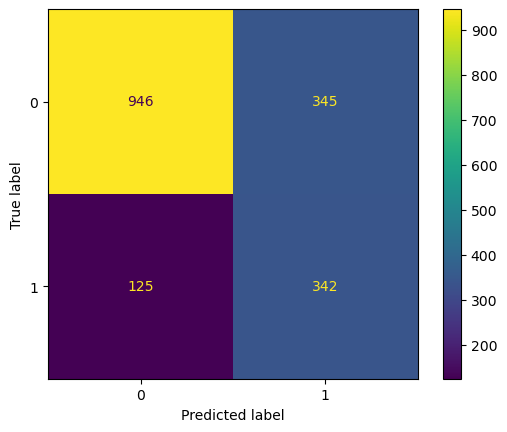

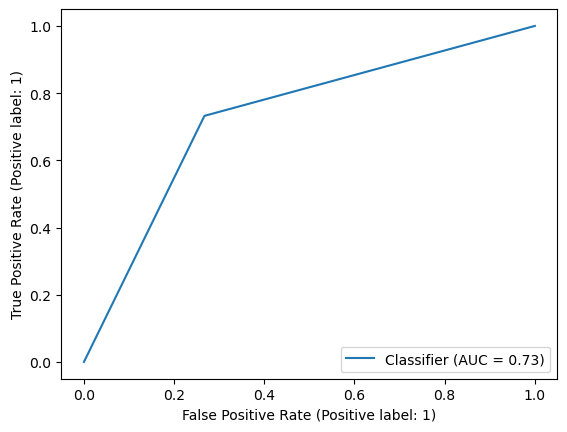

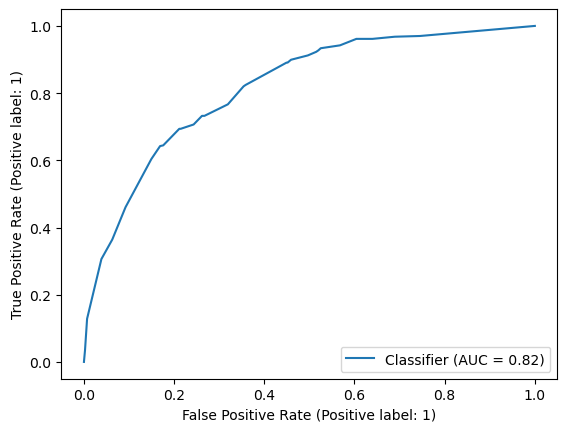

In [ ]:
mentrics_eval(grid_tree, features_test, target_test,1,1,1,1)

использование парамера clss_weight: 'balanced', добавляет к метрике 0.05

модель в основном сильно ошибается с классом, которого мало, то есть с теми, кто расторгнул договор, даже при том, что весы были настроены

в основном у всех общая площадь по AUC будет у всех примерно одинаковая, 

## Попробуем использовать стратификацию

In [ ]:
tree_param = {
    'tree__criterion': ['gini', 'entropy', 'log_loss'],
    'tree__max_depth': range(5,20,2),
    'tree__min_samples_split': range(2,14,2),
    'tree__class_weight': ['balanced'],
}

In [ ]:
skf = StratifiedKFold(5, shuffle=True, random_state=seed)
pipeline = Pipeline(steps = [
                                ('preprocessor', preprocessor),
                                ('tree', DecisionTreeClassifier(random_state=seed)),
                            ])

grid = GridSearchCV(pipeline,
                    param_grid=tree_param,
                    cv=skf,
                    verbose=2,
                    n_jobs=-1,
                    scoring='roc_auc')

In [ ]:
grid.fit(features_train, target_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=5, tree__min_samples_split=2; total time=   0.5s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=5, tree__min_samples_split=2; total time=   0.5s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=5, tree__min_samples_split=4; total time=   0.5s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=5, tree__min_samples_split=2; total time=   0.5s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=5, tree__min_samples_split=2; total time=   0.5s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=5, tree__min_samples_split=4; total time=   0.5s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=5, tree__min_samples_split=4; total time=   0.5s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tr

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=120922, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('minmax',
                                                                                          MinMaxScaler())]),
                                                                         ['MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse=False)),
                                                                                         (...
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'gender',
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'MultipleLines'])])),
                                       ('tree',
                                        DecisionTreeClassifier(random_state=120922))]),
             n_jobs=-1,
             param_grid={'tree__class_weight': ['balanced'],
                         'tree__criterion': ['gini', 'entropy', 'log_loss'],
                         'tree__max_depth': range(5, 20, 2),
                         'tree__min_samples_split': range(2, 14, 2)},
             scoring='roc_auc', verbose=2)

In [ ]:
grid.best_params_

{'tree__class_weight': 'balanced',
 'tree__criterion': 'gini',
 'tree__max_depth': 5,
 'tree__min_samples_split': 10}

Metrics:
roc_auc of predictions:       0.7433458783175235
accuracy_test of predictions: 0.7224118316268487


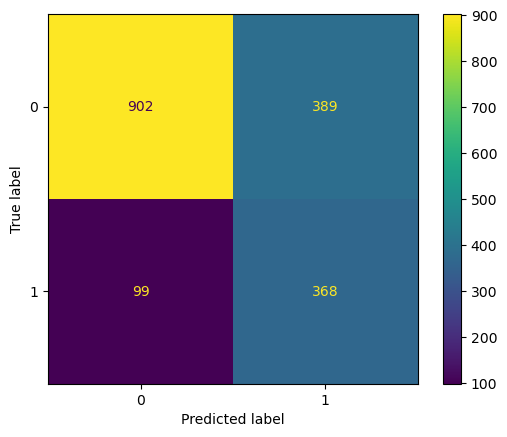

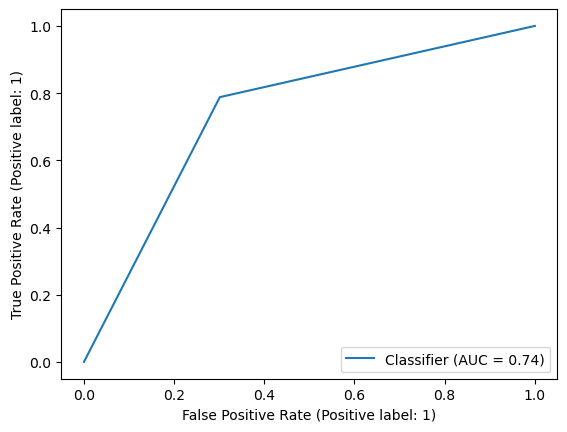

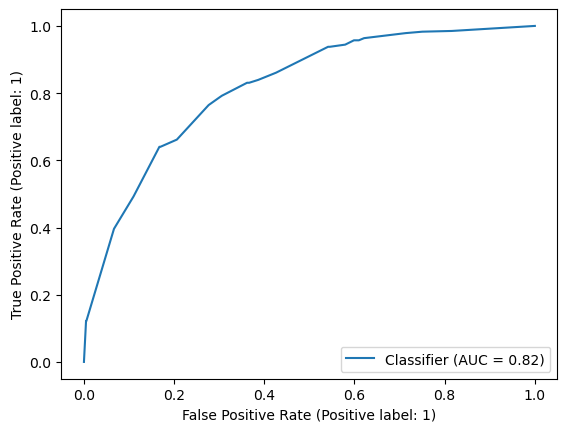

In [ ]:
mentrics_eval(grid.best_estimator_, features_test, target_test,1,1,1,1)

интересно, что стратифицированная кросс валидация, хоть и улучшает нахождение истино отрицательных вариантов, но ситуация с ложно положительными вариантами усугубляется

## Эксперимент оптимизации признаков

In [ ]:
tree_param = {
    'tree__criterion': ['gini', 'entropy', 'log_loss'],
    'tree__max_depth': range(5,20,5),
    'tree__min_samples_split': range(2,14,2),
    'tree__class_weight': ['balanced'],
}

In [ ]:
skf = StratifiedKFold(5, shuffle=True, random_state=seed)
pipeline = Pipeline(steps = [
                                    ('preprocessor', preprocessor),
                                    ('selector', GenericUnivariateSelect(score_func=mutual_info_classif, 
                                                                            mode='k_best', 
                                                                            param=6)),
                                    ('tree', DecisionTreeClassifier(random_state=seed)),
                                ])

grid = GridSearchCV(pipeline,
                        param_grid=tree_param,
                        cv=skf,
                        verbose=2,
                        n_jobs=-1,
                        scoring='roc_auc')
    
grid.fit(features_train, target_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=5, tree__min_samples_split=2; total time=   1.0s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=5, tree__min_samples_split=2; total time=   1.1s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=5, tree__min_samples_split=2; total time=   1.1s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=5, tree__min_samples_split=2; total time=   1.2s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=5, tree__min_samples_split=4; total time=   1.1s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=5, tree__min_samples_split=4; total time=   1.1s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tree__max_depth=5, tree__min_samples_split=4; total time=   1.1s
[CV] END tree__class_weight=balanced, tree__criterion=gini, tre

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=120922, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('minmax',
                                                                                          MinMaxScaler())]),
                                                                         ['MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse=False)),
                                                                                         (...
                                        GenericUnivariateSelect(mode='k_best',
                                                                param=6,
                                                                score_func=<function mutual_info_classif at 0x7f7b4e4090d0>)),
                                       ('tree',
                                        DecisionTreeClassifier(random_state=120922))]),
             n_jobs=-1,
             param_grid={'tree__class_weight': ['balanced'],
                         'tree__criterion': ['gini', 'entropy', 'log_loss'],
                         'tree__max_depth': range(5, 20, 5),
                         'tree__min_samples_split': range(2, 14, 2)},
             scoring='roc_auc', verbose=2)

Metrics:
roc_auc of predictions:       0.7305667468904307
accuracy_test of predictions: 0.7207053469852105


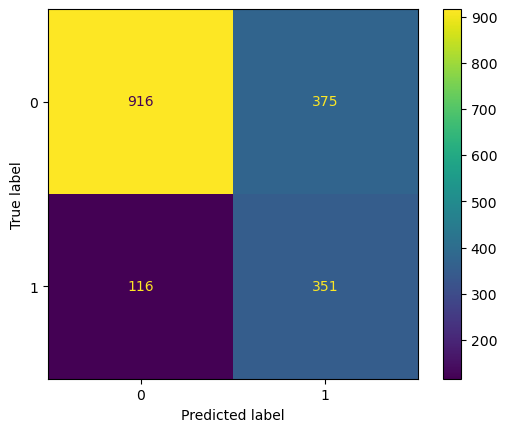

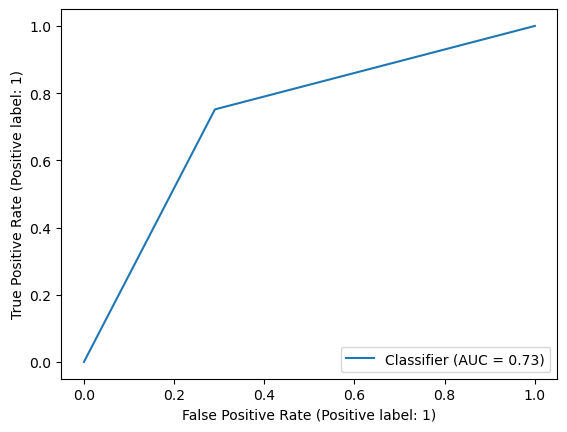

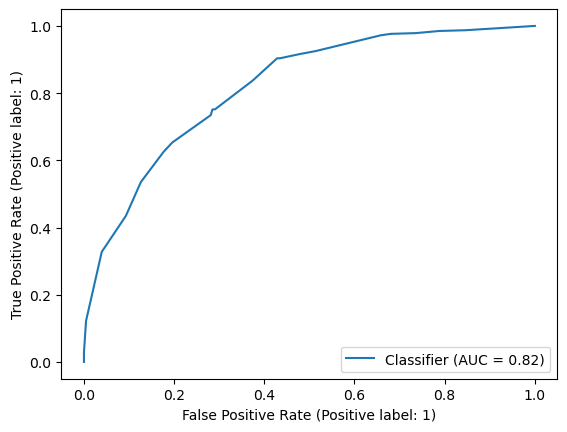

In [ ]:
mentrics_eval(grid.best_estimator_, features_test, target_test,1,1,1,1)

значительно ничего не изменилось

слегка улучшилась ситуация с истынными, но ситуация с ложными ухудшилась относительно варианта с стратификацией

# Форест

## Простая проверка

In [ ]:
pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('classificator',RandomForestClassifier())
           ])

In [ ]:
tree_results = cross_val_score(pipeline, features_train, target_train, cv=10, scoring='roc_auc', verbose=1)
tree_results

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.2s finished


array([0.81170839, 0.82071981, 0.84179999, 0.84999175, 0.82122554,
       0.80692137, 0.81637135, 0.82011812, 0.84011628, 0.78152455])

## Подбираем параметры

In [ ]:
forest_param = {
    'forest__criterion': ['gini'],
    'forest__n_estimators': range(100,500,50),
    'forest__max_depth': range(2,20,2),
    'forest__class_weight': ['balanced'],
}

In [ ]:
pipeline = Pipeline(steps = [
                                ('preprocessor', preprocessor),
                                ('forest', RandomForestClassifier(random_state=seed)),
                            ])

grid = GridSearchCV(pipeline,
                    param_grid=forest_param,
                    cv=5,
                    verbose=2,
                    n_jobs=-1,
                    scoring='roc_auc')

In [ ]:
grid.fit(features_train, target_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=100; total time=   0.7s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=100; total time=   0.8s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=100; total time=   0.8s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=100; total time=   0.8s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=100; total time=   0.8s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=150; total time=   0.9s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=150; total time=   0.9s
[CV] END forest__class_weigh

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('minmax',
                                                                                          MinMaxScaler())]),
                                                                         ['MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse=False)),
                                                                                         ('KNN',
                                                                                          KNNImputer())]),
                                                                         ['Type',
                                                                          'PaperlessBilling',
                                                                          'PaymentMe...
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'gender',
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'MultipleLines'])])),
                                       ('forest',
                                        RandomForestClassifier(random_state=120922))]),
             n_jobs=-1,
             param_grid={'forest__class_weight': ['balanced'],
                         'forest__criterion': ['gini'],
                         'forest__max_depth': range(2, 20, 2),
                         'forest__n_estimators': range(100, 500, 50)},
             scoring='roc_auc', verbose=2)

In [ ]:
grid.best_params_

{'forest__class_weight': 'balanced',
 'forest__criterion': 'gini',
 'forest__max_depth': 8,
 'forest__n_estimators': 150}

Metrics:
roc_auc of predictions:       0.7578359155875714
accuracy_test of predictions: 0.7497155858930603


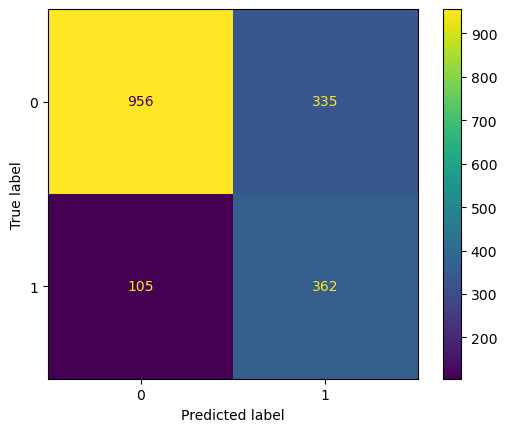

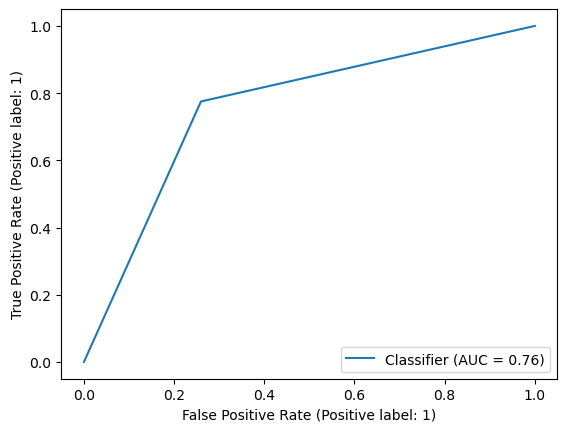

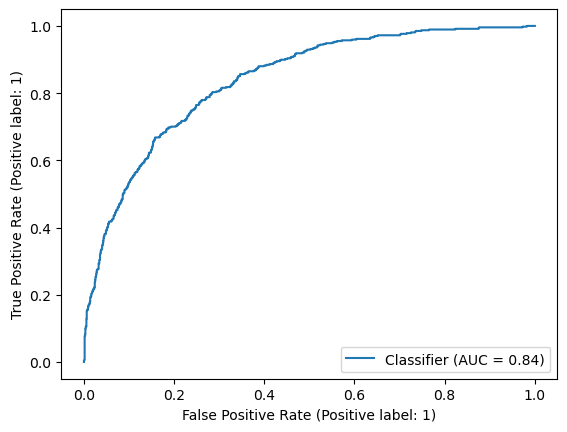

In [ ]:
mentrics_eval(grid.best_estimator_, features_test, target_test,1,1,1,1)

лес чуть больше разделяет истино отрицательные случаи, но с остальными вариантами ситуация сильно не меняется

по отношению к дереву, у леса общая площадь AUC чуть больше

## Стратификация

In [ ]:
forest_param = {
    'forest__criterion': ['gini'],
    'forest__n_estimators': range(100,500,50),
    'forest__max_depth': range(2,20,2),
    'forest__class_weight': ['balanced'],
}

In [ ]:
skf = StratifiedKFold(5, shuffle=True, random_state=seed)
pipeline = Pipeline(steps = [
                                ('preprocessor', preprocessor),
                                ('forest', RandomForestClassifier(random_state=seed)),
                            ])

grid = GridSearchCV(pipeline,
                    param_grid=forest_param,
                    cv=skf,
                    verbose=2,
                    n_jobs=-1,
                    scoring='roc_auc')

In [ ]:
grid.fit(features_train, target_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=100; total time=   0.7s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=100; total time=   0.7s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=100; total time=   0.7s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=100; total time=   0.8s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=100; total time=   0.8s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=150; total time=   0.8s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__n_estimators=150; total time=   0.9s
[CV] END forest__class_weigh

In [ ]:
grid.best_score_

0.846805178128967

In [ ]:
grid.best_params_

{'forest__class_weight': 'balanced',
 'forest__criterion': 'gini',
 'forest__max_depth': 8,
 'forest__n_estimators': 400}

Metrics:
roc_auc of predictions:       0.7601820874875809
accuracy_test of predictions: 0.7491467576791809


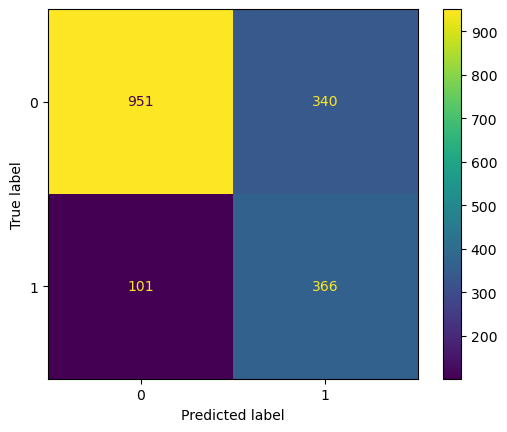

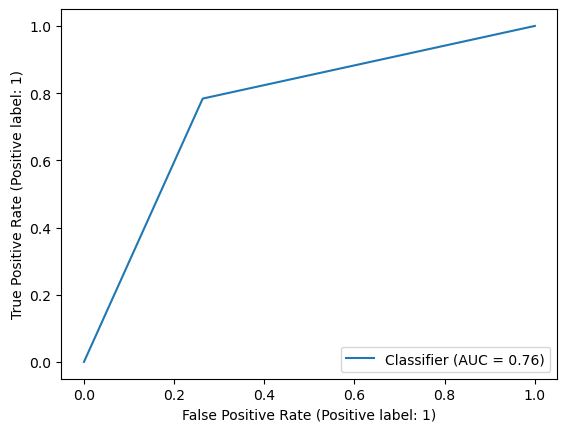

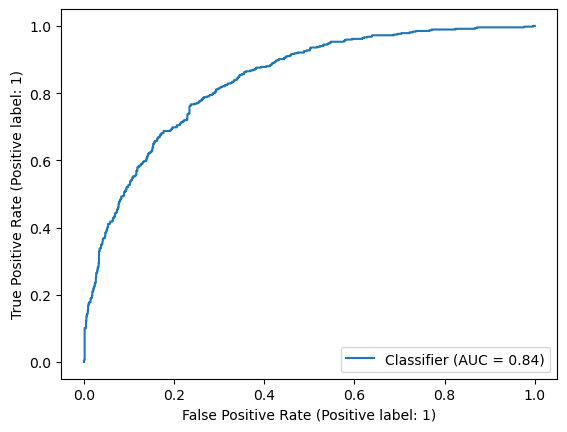

In [ ]:
mentrics_eval(grid.best_estimator_, features_test, target_test,1,1,1,1)

так же не много изменилось в метрике и ситуации

## Тест оптимизации признаков

In [ ]:
forest_param = {
    'forest__criterion': ['gini', 'entropy', 'log_loss'],
    'forest__n_estimators': range(100,301,50),
    'forest__max_depth': range(2,15,2),
    'forest__min_samples_split': range(2,7,2),
    'forest__class_weight': ['balanced'],
}

In [ ]:
skf = StratifiedKFold(5, shuffle=True, random_state=seed)
pipeline = Pipeline(steps = [
                                ('preprocessor', preprocessor),
                                ('selector', GenericUnivariateSelect(score_func=mutual_info_classif, 
                                                                        mode='k_best', 
                                                                        param=6)),
                                ('forest', RandomForestClassifier(random_state=seed)),
                            ])

grid = GridSearchCV(pipeline,
                    param_grid=forest_param,
                    cv=skf,
                    verbose=2,
                    n_jobs=-1,
                    scoring='roc_auc')

In [ ]:
grid.fit(features_train, target_train)

Fitting 5 folds for each of 315 candidates, totalling 1575 fits
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__min_samples_split=2, forest__n_estimators=100; total time=   1.3s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__min_samples_split=2, forest__n_estimators=100; total time=   1.3s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__min_samples_split=2, forest__n_estimators=100; total time=   1.3s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__min_samples_split=2, forest__n_estimators=100; total time=   1.3s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__min_samples_split=2, forest__n_estimators=100; total time=   1.3s
[CV] END forest__class_weight=balanced, forest__criterion=gini, forest__max_depth=2, forest__min_samples_split=2, forest__n_estimators=150; t

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=120922, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('minmax',
                                                                                          MinMaxScaler())]),
                                                                         ['MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse=False)),
                                                                                         (...
                                                                score_func=<function mutual_info_classif at 0x7f7b4e4090d0>)),
                                       ('forest',
                                        RandomForestClassifier(random_state=120922))]),
             n_jobs=-1,
             param_grid={'forest__class_weight': ['balanced'],
                         'forest__criterion': ['gini', 'entropy', 'log_loss'],
                         'forest__max_depth': range(2, 15, 2),
                         'forest__min_samples_split': range(2, 7, 2),
                         'forest__n_estimators': range(100, 301, 50)},
             scoring='roc_auc', verbose=2)

In [ ]:
grid.best_params_

{'forest__class_weight': 'balanced',
 'forest__criterion': 'log_loss',
 'forest__max_depth': 6,
 'forest__min_samples_split': 4,
 'forest__n_estimators': 150}

Metrics:
roc_auc of predictions:       0.7523225360219076
accuracy_test of predictions: 0.7406143344709898


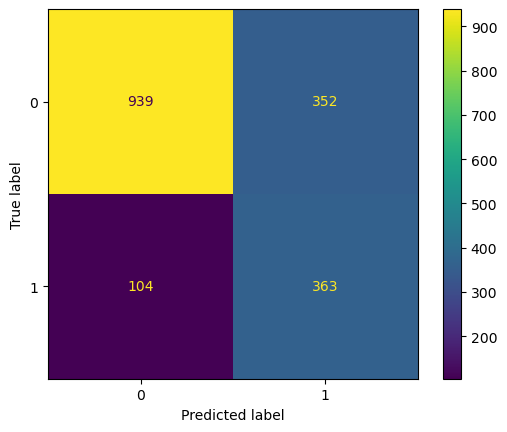

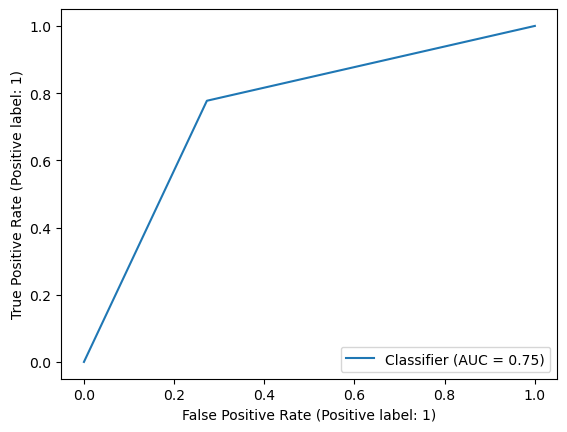

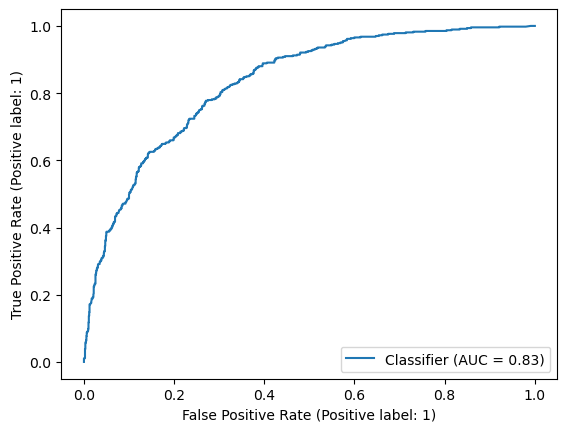

In [ ]:
mentrics_eval(grid.best_estimator_, features_test, target_test,1,1,1,1)

уменьшения количества признаков и выбор только наиболее значимых не привел к значимому улучшению метрики.

# Логистическая классификация

## Простая проверка

In [ ]:
pipeline = Pipeline(steps = [
                     ('preprocessor', preprocessor),
                     ('logistic', LogisticRegression(random_state=seed))
           ])

In [ ]:
logistic_results = cross_val_score(pipeline, features_train, target_train, cv=10, scoring='roc_auc', verbose=1)
logistic_results

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


array([0.81756373, 0.81971649, 0.82991532, 0.83352356, 0.824677  ,
       0.83920266, 0.82275748, 0.7977667 , 0.8284976 , 0.82720561])

## Подбираем параметры

In [ ]:
log_param = {
    'logistic__C': np.arange(0.1,1.1,0.1),
    'logistic__class_weight': ['balanced'],
    'logistic__solver': ['liblinear'],
}

In [ ]:
pipeline = Pipeline(steps = [
                                ('preprocessor', preprocessor),
                                ('logistic', LogisticRegression(random_state=seed)),
                            ])

grid = GridSearchCV(pipeline,
                    param_grid=log_param,
                    cv=10,
                    verbose=2,
                    n_jobs=-1,
                    scoring='roc_auc')

In [ ]:
grid.fit(features_train, target_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END logistic__C=0.1, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.1, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.1, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.1, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.1, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.1, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.1, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.1, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.1, logistic__class_weight=balanced, logistic__solver=liblinear; to

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('minmax',
                                                                                          MinMaxScaler())]),
                                                                         ['MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse=False)),
                                                                                         ('KNN',
                                                                                          KNNImputer())]),
                                                                         ['Type',
                                                                          'PaperlessBilling',
                                                                          'PaymentM...
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'gender',
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'MultipleLines'])])),
                                       ('logistic',
                                        LogisticRegression(random_state=120922))]),
             n_jobs=-1,
             param_grid={'logistic__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'logistic__class_weight': ['balanced'],
                         'logistic__solver': ['liblinear']},
             scoring='roc_auc', verbose=2)

In [ ]:
grid.best_params_

{'logistic__C': 1.0,
 'logistic__class_weight': 'balanced',
 'logistic__solver': 'liblinear'}

Metrics:
roc_auc of predictions:       0.7453288040909144
accuracy_test of predictions: 0.7343572241183163


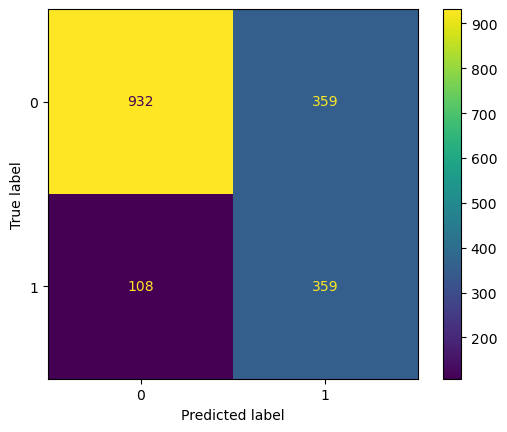

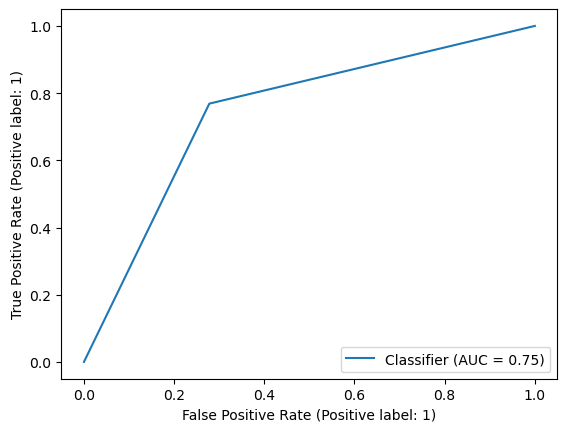

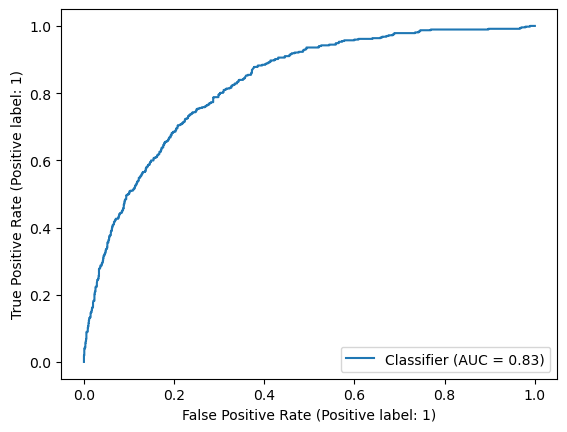

In [ ]:
mentrics_eval(grid.best_estimator_, features_test, target_test,1,1,1,1)

из за того, что в логистической регрессии не были настроены весы для классов, то уровень срабатывания не совсем оптимальный
но даннай картина позволяет нам предположить, что скорее всего при использовании нескольких логистических регрессий, которые мы в последующем соединим, может привести к увеличению метрики

upd:

хотя уже не уверен, возможно основная проблема находится в данных, но я плохо уже представляю, что можно применить, чтобы хоть как то сдвинуть дальше метрику

## Стратификация

In [ ]:
skf = StratifiedKFold(10, shuffle=True, random_state=seed)
pipeline = Pipeline(steps = [
                                ('preprocessor', preprocessor),
                                ('logistic', LogisticRegression(random_state=seed)),
                            ])

grid = GridSearchCV(pipeline,
                    param_grid=log_param,
                    cv=skf,
                    verbose=2,
                    n_jobs=-1,
                    scoring='roc_auc')

In [ ]:
grid.fit(features_train, target_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END logistic__C=0.1, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.1, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.1, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.1, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.1, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.1, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.1, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.1, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.0s
[CV] END logistic__C=0.1, logistic__class_weight=balanced, logistic__solver=liblinear; to

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=120922, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('minmax',
                                                                                          MinMaxScaler())]),
                                                                         ['MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse=False)),...
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'gender',
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'MultipleLines'])])),
                                       ('logistic',
                                        LogisticRegression(random_state=120922))]),
             n_jobs=-1,
             param_grid={'logistic__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'logistic__class_weight': ['balanced'],
                         'logistic__solver': ['liblinear']},
             scoring='roc_auc', verbose=2)

In [ ]:
grid.best_params_

{'logistic__C': 0.8,
 'logistic__class_weight': 'balanced',
 'logistic__solver': 'liblinear'}

Metrics:
roc_auc of predictions:       0.7453288040909144
accuracy_test of predictions: 0.7343572241183163


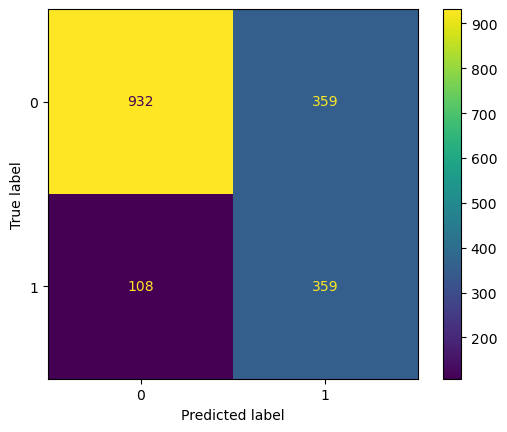

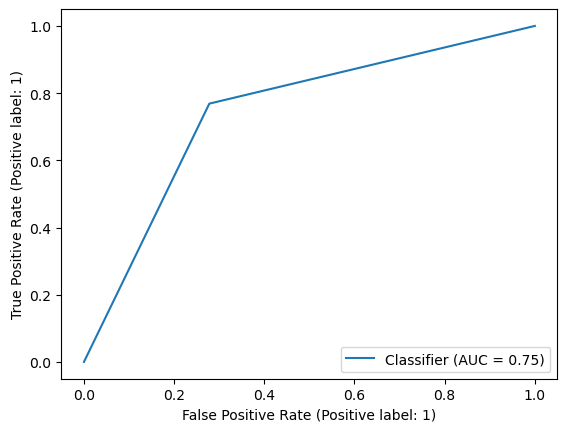

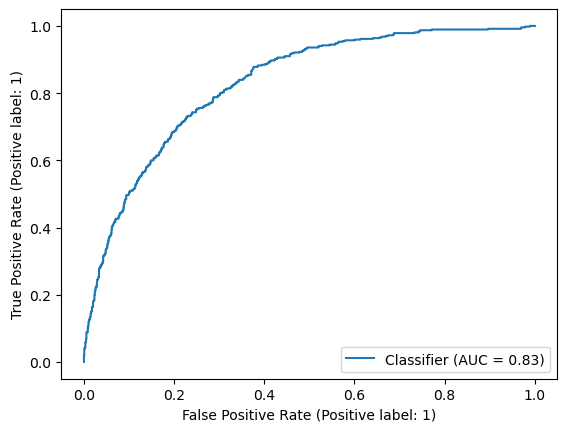

In [ ]:
mentrics_eval(grid.best_estimator_, features_test, target_test,1,1,1,1)

## Тест оптимизации признаков

In [ ]:
skf = StratifiedKFold(10, shuffle=True, random_state=seed)
pipeline = Pipeline(steps = [
                                    ('preprocessor', preprocessor),
                                    ('selector', GenericUnivariateSelect(score_func=mutual_info_classif, 
                                                                            mode='k_best', 
                                                                            param=6)),
                                    ('logistic', LogisticRegression(random_state=seed)),
                                ])

grid = GridSearchCV(pipeline,
                        param_grid=log_param,
                        cv=skf,
                        verbose=2,
                        n_jobs=-1,
                        scoring='roc_auc')
grid.fit(features_train, target_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END logistic__C=0.1, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.4s
[CV] END logistic__C=0.1, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.5s
[CV] END logistic__C=0.1, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.5s
[CV] END logistic__C=0.1, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.5s
[CV] END logistic__C=0.2, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.4s
[CV] END logistic__C=0.2, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.5s
[CV] END logistic__C=0.2, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.4s
[CV] END logistic__C=0.1, logistic__class_weight=balanced, logistic__solver=liblinear; total time=   0.5s
[CV] END logistic__C=0.2, logistic__class_weight=balanced, logistic__solver=liblinear; to

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=120922, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('minmax',
                                                                                          MinMaxScaler())]),
                                                                         ['MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse=False)),...
                                       ('selector',
                                        GenericUnivariateSelect(mode='k_best',
                                                                param=6,
                                                                score_func=<function mutual_info_classif at 0x7f7b4e4090d0>)),
                                       ('logistic',
                                        LogisticRegression(random_state=120922))]),
             n_jobs=-1,
             param_grid={'logistic__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'logistic__class_weight': ['balanced'],
                         'logistic__solver': ['liblinear']},
             scoring='roc_auc', verbose=2)

Metrics:
roc_auc of predictions:       0.7415006211674631
accuracy_test of predictions: 0.7207053469852105


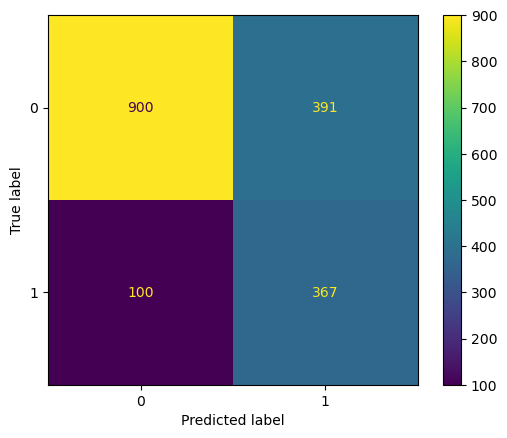

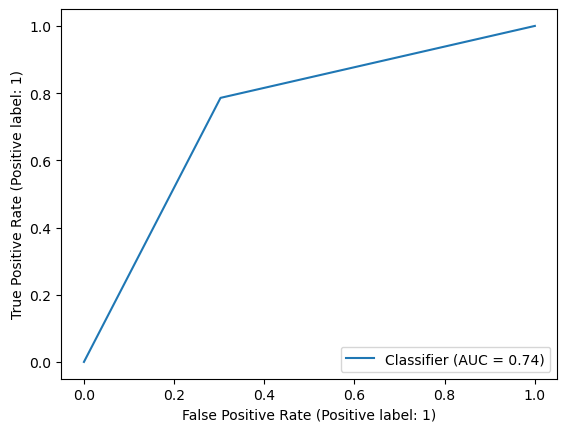

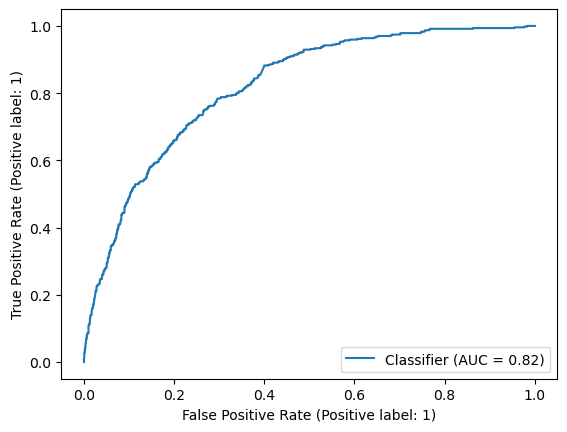

In [ ]:
mentrics_eval(grid.best_estimator_, features_test, target_test,1,1,1,1)

в целом всес похоже как между самими регрессиями, так и между предыдущими моделями


# manual KNN

In [1]:
# грубо
(7000 - 5000) / 7000

0.2857142857142857

так как датасет обладал достаточным количеством пропущенных значений, около 20%, что значительно влияет на последующее обучение, необходимо было использовать какие либо методы заполнения пропущенных значений

KNN считается достаточно продвинутым, поэтому он и использовался

и другие методы нам не доступны: например уточнить у соответствующего отдела (запросить данные), либо еще какие нибудь взаимодействия с иточником, что было бы идеальным решением

другие методики слабо подходят, так как у нас большое количество пропущенных данных

с одной стороны можно было использовать классы для sklearn чтобы использовать пайплайн, но изначально сделал этот раздел используя нативные инструменты

изначально не было понимания того, как добавить KNN в пайплайн, и до этого проекта была попытка использовать его руками, то предыдущая часть проекта не содержала эксперименты с использованием KNN

## Подготовка данных

In [ ]:
features_train, features_test, target_train, target_test = manual_knn((df_contract, df_internet, df_personal, df_phone,), 
                                                                        categorical_features, 
                                                                        numeric_features,)

/tmp/ipykernel_4719/2934735090.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = df['TotalCharges'].astype('float')
/tmp/ipykernel_4719/2934735090.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['EndDate'], inplace=True)
/tmp/ipykernel_4719/545646823.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[train.notnull()] = np.sq

## Catboost

In [ ]:
# initialize Pool
train_pool = Pool(features_train, 
                  target_train, cat_features=categorical_features, feature_names=list(features_train.columns))
test_pool = Pool(features_test, cat_features=categorical_features, feature_names=list(features_test.columns))


        roc_auc of predictions:       0.76585386890298
        accuracy_test of predictions: 0.7474402730375427


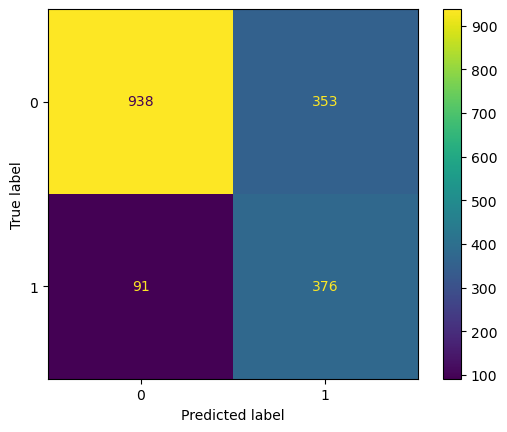

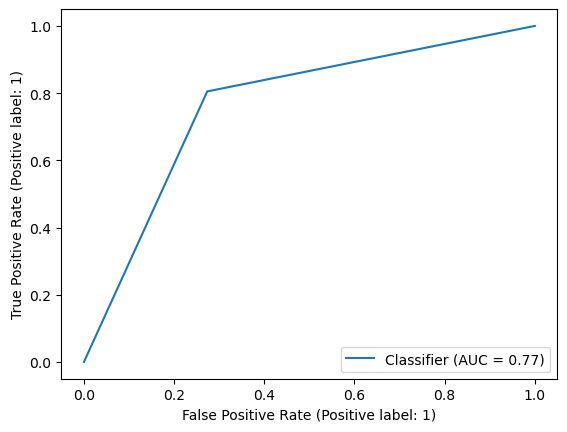

In [ ]:
# первичный тест CatBoost
CatBC = CatBoostClassifier(
        early_stopping_rounds=5,
        auto_class_weights="Balanced",
        boosting_type="Ordered",
        random_state=seed
    )

CatBC.fit(
        train_pool,
        verbose=False,
        # plot=True
    )
    # make the prediction using the resulting model
mentrics_eval(CatBC, features_test, target_test,1,1,1,1)


благодаря внутренним параметрам CatBoost увеличили метрику до 0.76 но это максимум

ситуация с confusion matrix не сильно поменялась относительно остальных моделей

### Эксперимент с алгоритмами апсемплинга

алгоритмы создают синтетические данные на основе расстояния до ближайших

так как все попытки и надежды на то, что используя другую технологию модели можно будет достигнуть большей метрики не увенчались успехом, было интересно посмотреть как метрика изменится относительно изменения данных

так как у нас изначально присутствует дисбаланс классов, то с помощью алгоритмов апсемплинга синтетических данных можно было бы решить эту проблему

так же пробовался апсемплинг путем создания копий, но большого смысла он не привносил, поэтому был удален

#### AllKNN

In [ ]:
from imblearn.under_sampling import AllKNN
allknn = AllKNN()

In [ ]:
features_train, features_test, target_train, target_test = manual_knn((df_contract, df_internet, df_personal, df_phone,), 
                                                                        categorical_features, 
                                                                        numeric_features,)

/tmp/ipykernel_4719/2934735090.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4719/2934735090.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4719/545646823.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4719/545646823.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See

In [ ]:
features_train, target_train = allknn.fit_resample(features_train, target_train)


        roc_auc of predictions:       0.7525912386361185
        accuracy_test of predictions: 0.6928327645051194


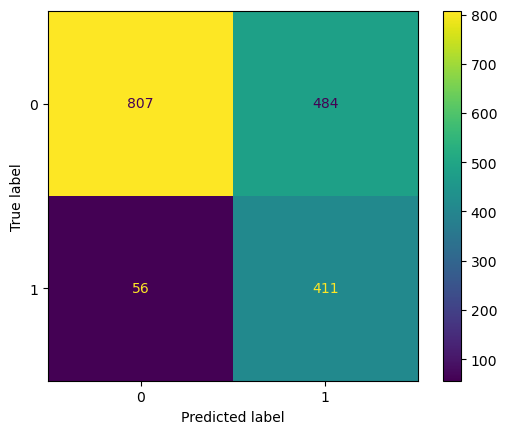

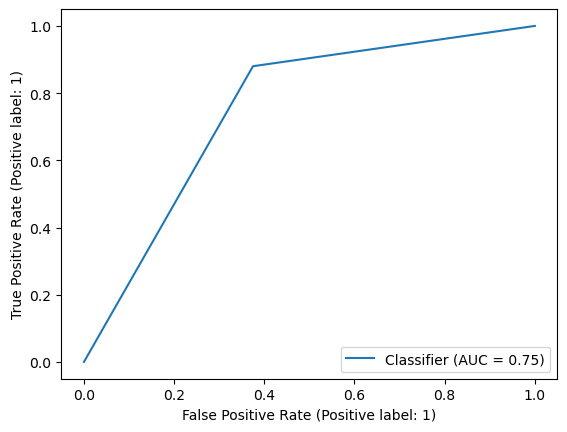

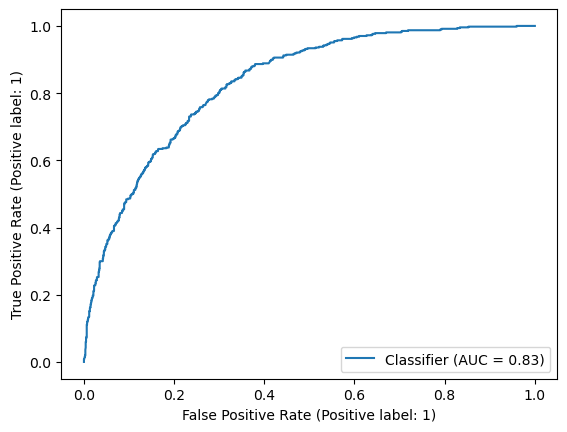

In [ ]:
# initialize Pool
train_pool = Pool(features_train, 
                  target_train, cat_features=categorical_features, feature_names=list(features_train.columns))
test_pool = Pool(features_test, cat_features=categorical_features, feature_names=list(features_test.columns))

CatBC = CatBoostClassifier(
        early_stopping_rounds=5,
        auto_class_weights="Balanced",
        boosting_type="Ordered",
        random_state=seed
    )

CatBC.fit(
        train_pool,
        verbose=False,
        # plot=True
    )
    # make the prediction using the resulting model

mentrics_eval(CatBC, features_test, target_test,1,1,1,1)


#### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN, SVMSMOTE

In [ ]:
features_train, features_test, target_train, target_test = manual_knn((df_contract, df_internet, df_personal, df_phone,), 
                                                                        categorical_features, 
                                                                        numeric_features,)

/tmp/ipykernel_4719/2934735090.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4719/2934735090.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4719/545646823.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4719/545646823.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See

In [ ]:
sm = SMOTE(random_state=seed)

In [ ]:
features_train, target_train = sm.fit_resample(features_train, target_train)


        roc_auc of predictions:       0.7556498041954098
        accuracy_test of predictions: 0.7565415244596132


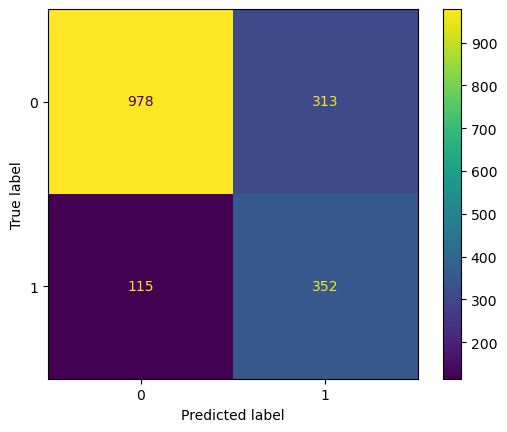

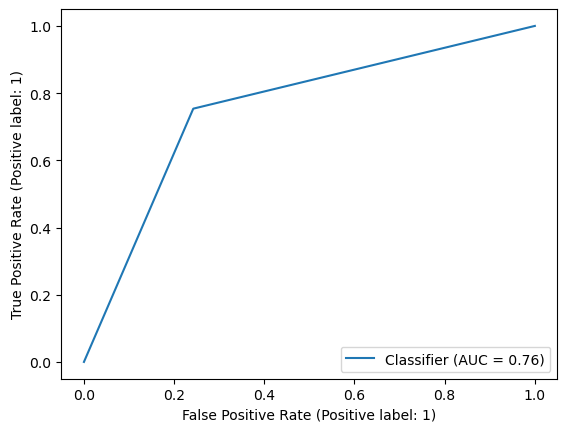

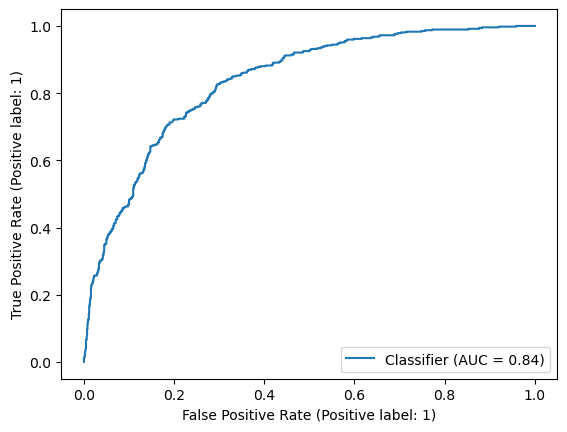

In [ ]:
# initialize Pool
train_pool = Pool(features_train, 
                  target_train, cat_features=categorical_features, feature_names=list(features_train.columns))
test_pool = Pool(features_test, cat_features=categorical_features, feature_names=list(features_test.columns))

CatBC = CatBoostClassifier(
        early_stopping_rounds=5,
        auto_class_weights="Balanced",
        boosting_type="Ordered",
        random_state=seed
    )

CatBC.fit(
        train_pool,
        verbose=False,
        # plot=True
    )
    # make the prediction using the resulting model

mentrics_eval(CatBC, features_test, target_test,1,1,1,1)


#### SVMSMOTE

In [ ]:
features_train, features_test, target_train, target_test = manual_knn((df_contract, df_internet, df_personal, df_phone,), 
                                                                        categorical_features, 
                                                                        numeric_features,)

/tmp/ipykernel_4719/2934735090.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4719/2934735090.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4719/545646823.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4719/545646823.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See

In [ ]:
svms = SVMSMOTE(random_state=seed)

In [ ]:
features_train, target_train = svms.fit_resample(features_train, target_train)

##### CatBoost


        roc_auc of predictions:       0.7542142355991157
        accuracy_test of predictions: 0.7514220705346986


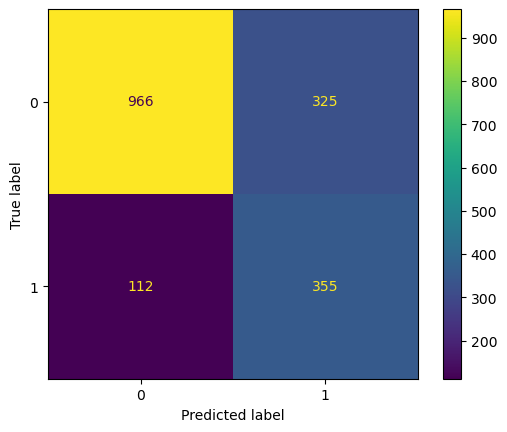

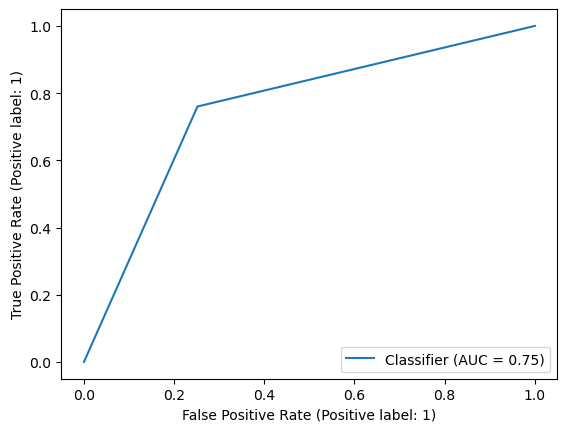

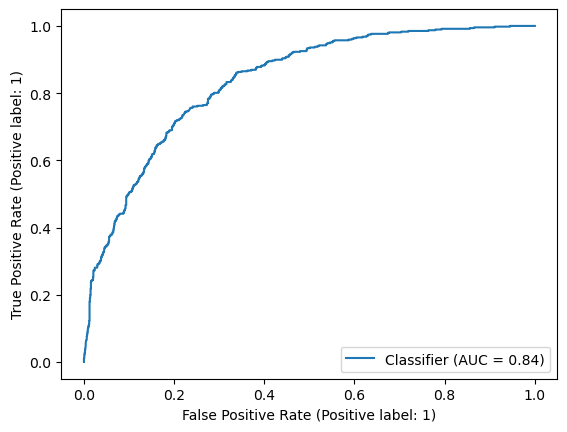

In [ ]:
# initialize Pool
train_pool = Pool(features_train, 
                  target_train, cat_features=categorical_features, feature_names=list(features_train.columns))
test_pool = Pool(features_test, cat_features=categorical_features, feature_names=list(features_test.columns))

CatBC = CatBoostClassifier(
        early_stopping_rounds=5,
        auto_class_weights="Balanced",
        boosting_type="Ordered",
        random_state=seed
    )

CatBC.fit(
        train_pool,
        verbose=False,
        # plot=True
    )
    # make the prediction using the resulting model

mentrics_eval(CatBC, features_test, target_test,1,1,1,1)


##### Тест нейронной сети

In [ ]:
params = {
    'hidden_layer_sizes': range(3,1000,50)
}

clf = MLPClassifier(hidden_layer_sizes=10, early_stopping=True, random_state=seed)

grid = GridSearchCV(clf,
                    param_grid=params,
                    cv=5,
                    verbose=2,
                    n_jobs=-1,
                    scoring='roc_auc')

In [ ]:
grid.fit(features_train.values, target_train)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits
[CV] END ...............................hidden_layer_sizes=7; total time=   0.3s
[CV] END ...............................hidden_layer_sizes=3; total time=   0.6s
[CV] END ...............................hidden_layer_sizes=7; total time=   0.4s
[CV] END ..............................hidden_layer_sizes=11; total time=   0.4s
[CV] END ..............................hidden_layer_sizes=11; total time=   0.4s
[CV] END ...............................hidden_layer_sizes=3; total time=   0.7s
[CV] END ...............................hidden_layer_sizes=3; total time=   0.7s
[CV] END ...............................hidden_layer_sizes=3; total time=   0.5s
[CV] END ..............................hidden_layer_sizes=11; total time=   0.4s
[CV] END ...............................hidden_layer_sizes=3; total time=   0.9s
[CV] END ..............................hidden_layer_sizes=15; total time=   0.5s
[CV] END ..............................hidden

GridSearchCV(cv=5,
             estimator=MLPClassifier(early_stopping=True, hidden_layer_sizes=10,
                                     random_state=120922),
             n_jobs=-1, param_grid={'hidden_layer_sizes': range(3, 1000, 4)},
             scoring='roc_auc', verbose=2)

In [ ]:
grid.best_score_

0.861669264430664

In [ ]:
grid.best_params_

{'hidden_layer_sizes': 899}

Metrics:
roc_auc of predictions:       0.7343037036176993
accuracy_test of predictions: 0.7332195676905574


/home/qq/miniconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names

/home/qq/miniconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names



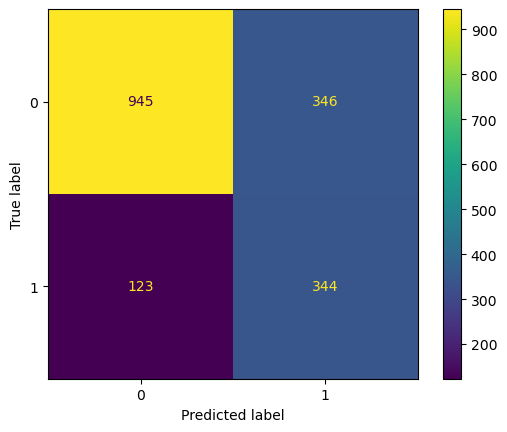

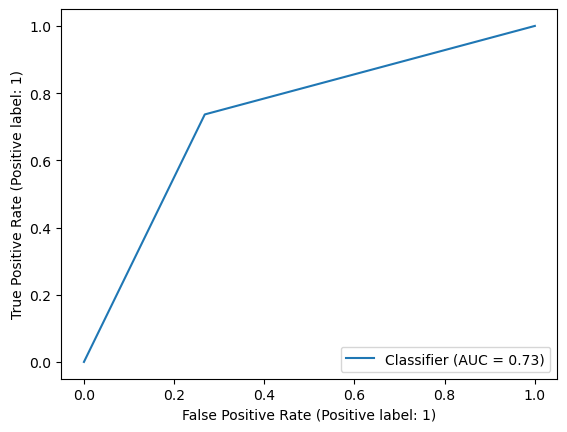

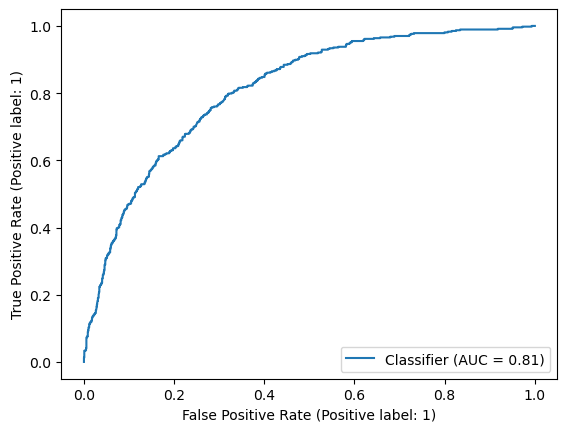

In [ ]:
mentrics_eval(grid.best_estimator_, features_test, target_test,1,1,1,1)

#### ADASYN

In [ ]:
features_train, features_test, target_train, target_test = manual_knn((df_contract, df_internet, df_personal, df_phone,), 
                                                                        categorical_features, 
                                                                        numeric_features,)

/tmp/ipykernel_4719/2934735090.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4719/2934735090.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4719/545646823.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4719/545646823.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See

In [ ]:
ad = ADASYN(random_state=seed)

In [ ]:
features_train, target_train = ad.fit_resample(features_train, target_train)


        roc_auc of predictions:       0.7532812404108828
        accuracy_test of predictions: 0.7610921501706485


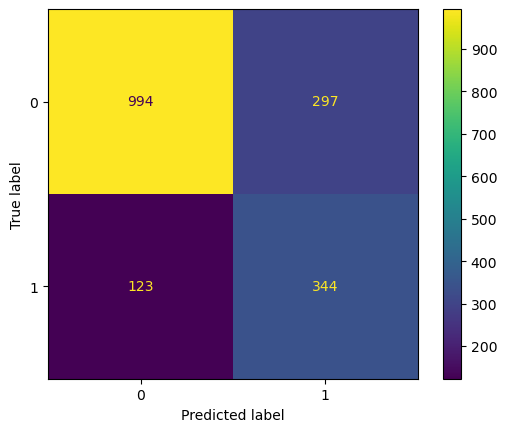

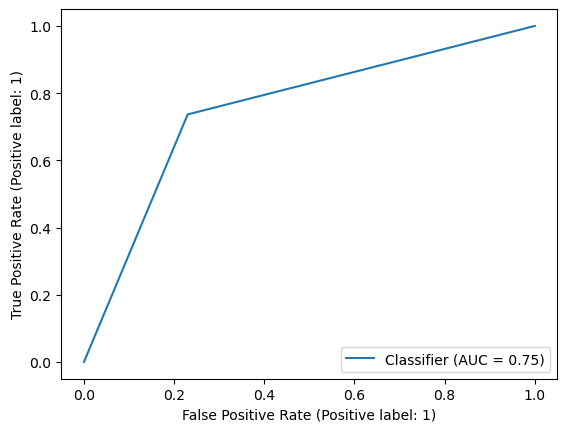

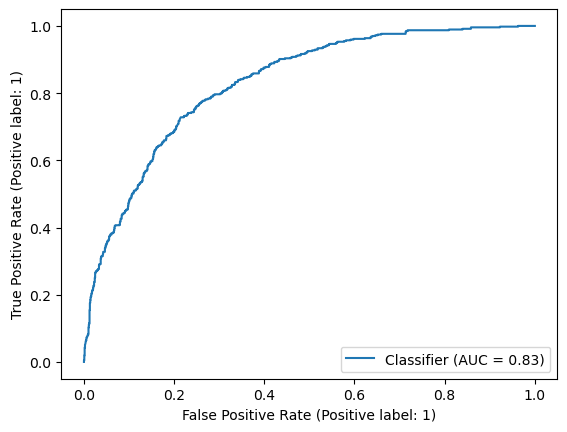

In [ ]:
# initialize Pool
train_pool = Pool(features_train, 
                  target_train, cat_features=categorical_features, feature_names=list(features_train.columns))
test_pool = Pool(features_test, cat_features=categorical_features, feature_names=list(features_test.columns))

CatBC = CatBoostClassifier(
        early_stopping_rounds=5,
        # auto_class_weights="Balanced",
        boosting_type="Ordered",
        random_state=seed
    )

CatBC.fit(
        train_pool,
        verbose=False,
        # plot=True
    )
    # make the prediction using the resulting model

mentrics_eval(CatBC, features_test, target_test,1,1,1,1)


#### Эксперимент с SMOTETomek

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
features_train, features_test, target_train, target_test = manual_knn((df_contract, df_internet, df_personal, df_phone,), 
                                                                        categorical_features, 
                                                                        numeric_features,)

/tmp/ipykernel_4719/2934735090.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4719/2934735090.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4719/545646823.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4719/545646823.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See

In [ ]:
st = SMOTETomek()

In [ ]:
features_train, target_train = st.fit_resample(features_train, target_train)

Metrics:
roc_auc of predictions:       0.755217723757126
accuracy_test of predictions: 0.7639362912400455


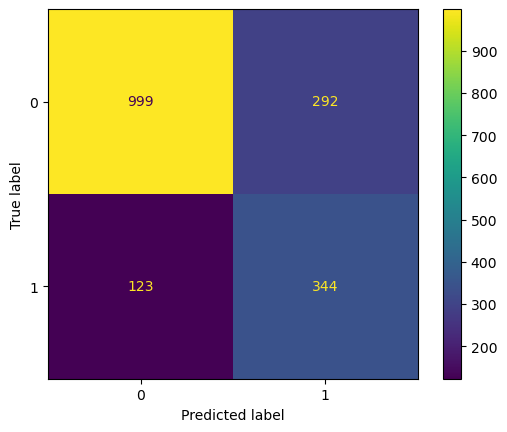

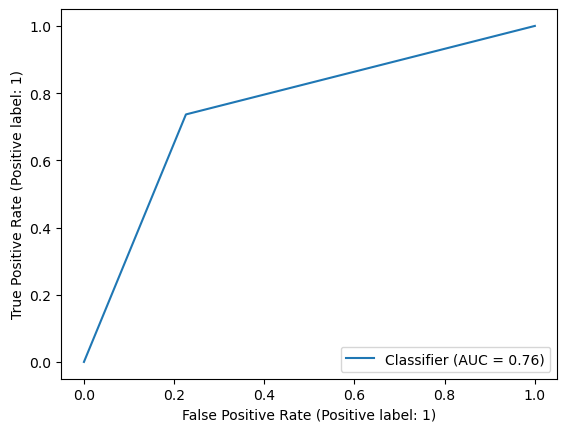

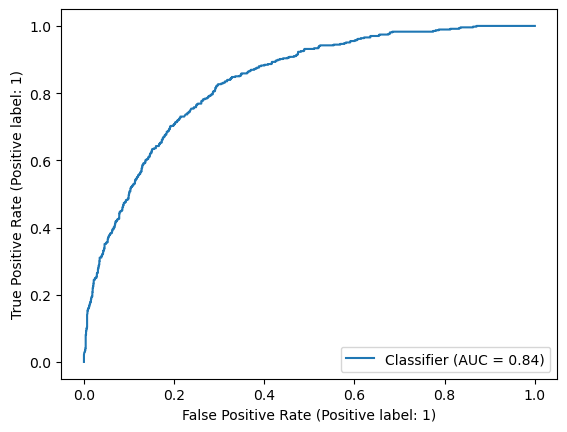

In [ ]:
# initialize Pool
train_pool = Pool(features_train, 
                  target_train, cat_features=categorical_features, feature_names=list(features_train.columns))
test_pool = Pool(features_test, cat_features=categorical_features, feature_names=list(features_test.columns))

CatBC = CatBoostClassifier(
        early_stopping_rounds=5,
        # auto_class_weights="Balanced",
        boosting_type="Ordered",
        random_state=seed
    )

CatBC.fit(
        train_pool,
        verbose=False,
        # plot=True
    )
    # make the prediction using the resulting model

mentrics_eval(CatBC, features_test, target_test,1,1,1,1)


по итогам экспериментов, выбранные алгоритмы в данном датасете не приводили к увеличению целевой метрики

при использовании алгоритма ADASYN увеличивалось количество истино отрицательных случаев
как и при использовании комбинированного алгоритма SMOTETomek

### Эксперимент выбора признаков

пробовал отбирать наиболее значимые признаки с помощью возможностей CatBoost

но значимых изменений тут не наблюдается

In [2]:
features_train, features_test, target_train, target_test = manual_knn((df_contract, df_internet, df_personal, df_phone,), 
                                                                        categorical_features, 
                                                                        numeric_features,)

NameError: name 'manual_knn' is not defined

In [3]:
# initialize Pool
train_pool = Pool(features_train, 
                  target_train, cat_features=categorical_features, feature_names=list(features_train.columns))
test_pool = Pool(features_test, cat_features=categorical_features, feature_names=list(features_test.columns))

CatBC = CatBoostClassifier(
        early_stopping_rounds=5,
        # auto_class_weights="Balanced",
        boosting_type="Ordered",
        random_state=seed
    )

CatBC.select_features(
                train_pool,
                features_for_select=list(features_train.columns),
                num_features_to_select=6,
                algorithm='RecursiveByShapValues',
                train_final_model=True,
                plot=True)

mentrics_eval(CatBC, features_test, target_test,1,1,1,1)

NameError: name 'Pool' is not defined

### Поиск весов

In [ ]:
features_train, features_test, target_train, target_test = manual_knn((df_contract, df_internet, df_personal, df_phone,), 
                                                                        categorical_features, 
                                                                        numeric_features,)

/tmp/ipykernel_4719/2934735090.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4719/2934735090.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4719/545646823.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4719/545646823.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See

In [ ]:
# initialize Pool
train_pool = Pool(features_train, 
                  target_train, cat_features=categorical_features, feature_names=list(features_train.columns))
test_pool = Pool(features_test, cat_features=categorical_features, feature_names=list(features_test.columns))

In [ ]:
weights = np.linspace(0.0,0.99,200)
auc_final = []

In [ ]:
for i in weights:
    CatBC = CatBoostClassifier(
        early_stopping_rounds=5,
        class_weights=[1-i, i],
        boosting_type="Ordered",
        random_state=seed
    )

    CatBC.fit(
        train_pool,
        verbose=False
    )

    cat_preds = CatBC.predict(test_pool)
    auc_final.append(roc_auc_score(target_test, cat_preds))

0.7705686045875166


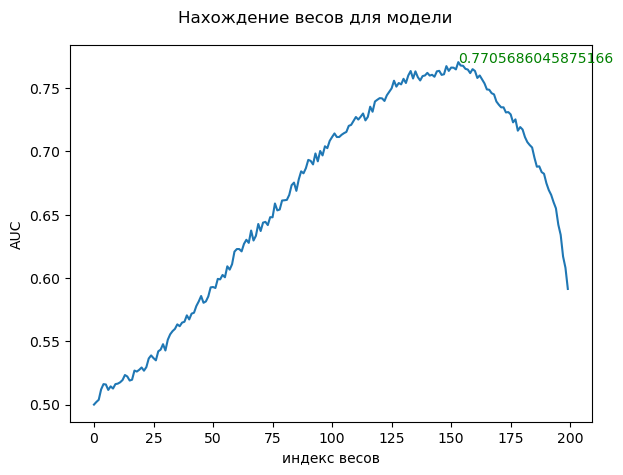

In [ ]:
i = pd.Series(auc_final)
best = np.array(auc_final).argmax()
print(auc_final[best])

x = i.index
y = i

# plot
fig, ax = plt.subplots()

ax.plot(x, y)

plt.text(best, auc_final[best], auc_final[best], color='g')

fig.suptitle('Нахождение весов для модели')
plt.ylabel('AUC')
plt.xlabel('индекс весов')
fig.tight_layout()
plt.show()


        roc_auc of predictions:       0.7660346626372333
        accuracy_test of predictions: 0.732650739476678


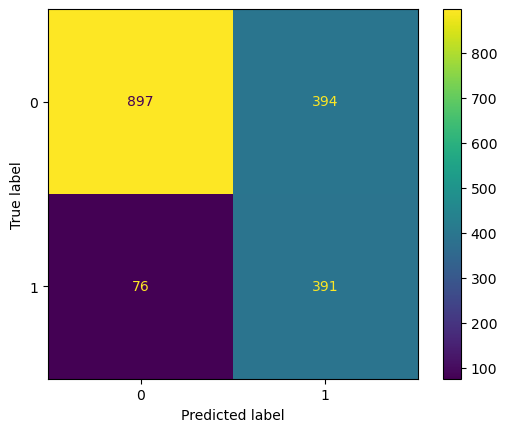

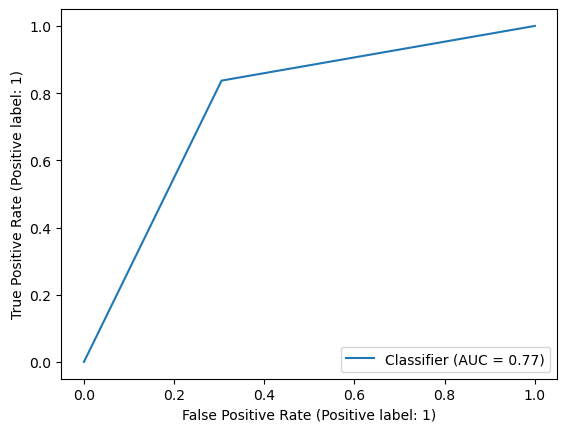

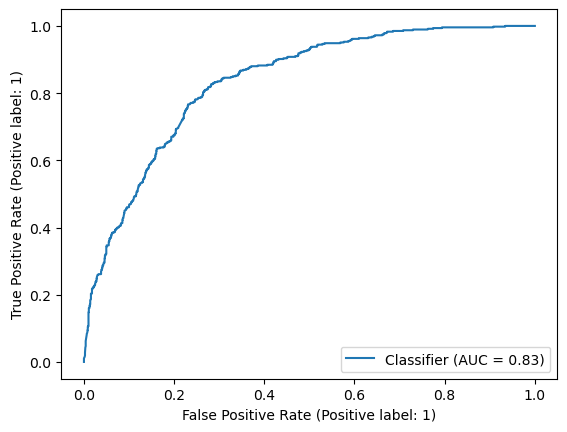

In [ ]:
weight1 = 0.7705686045875166

# initialize Pool
train_pool = Pool(features_train, 
                  target_train, cat_features=categorical_features, feature_names=list(features_train.columns))
test_pool = Pool(features_test, cat_features=categorical_features, feature_names=list(features_test.columns))

CatBC = CatBoostClassifier(
        early_stopping_rounds=5,
        class_weights=[1-weight1, weight1],
        boosting_type="Ordered",
        ignored_features=[8, 14, 15, 12, 7, 9, 13, 11, 6, 16, 1],
        random_state=seed
    )

CatBC.fit(
        train_pool,
        verbose=False
    )
    # make the prediction using the resulting model

mentrics_eval(CatBC, features_test, target_test,1,1,1,1)

Оптимизация весов для CatBoost привела к небольшому увеличению метрики, уменьшив количество ложно отрицательных случаев, но значение истино положительных и ложно положительных одинаково.

В случае задачи, кажется, это является более положительным результатом, нежели обратная ситуация

#### Поиск весов при использовании алгоритма апсемплинга SVMSMOTE

In [ ]:
features_train, features_test, target_train, target_test = manual_knn((df_contract, df_internet, df_personal, df_phone,), 
                                                                        categorical_features, 
                                                                        numeric_features,)

/tmp/ipykernel_4719/2934735090.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4719/2934735090.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4719/545646823.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4719/545646823.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See

In [ ]:
svms = SVMSMOTE(random_state=seed)
features_train, target_train = svms.fit_resample(features_train, target_train)

In [ ]:
# initialize Pool
train_pool = Pool(features_train, 
                  target_train, cat_features=categorical_features, feature_names=list(features_train.columns))
test_pool = Pool(features_test, cat_features=categorical_features, feature_names=list(features_test.columns))

In [ ]:
weights = np.linspace(0.0,0.99,200)
auc_final = []

In [ ]:
for i in weights:
    CatBC = CatBoostClassifier(
        early_stopping_rounds=5,
        class_weights=[1-i, i],
        random_state=seed
    )

    CatBC.fit(
        train_pool,
        verbose=False
    )
    # make the prediction using the resulting model
    cat_preds = CatBC.predict(test_pool)
    auc_final.append(roc_auc_score(target_test, cat_preds))

0.7625523099302203


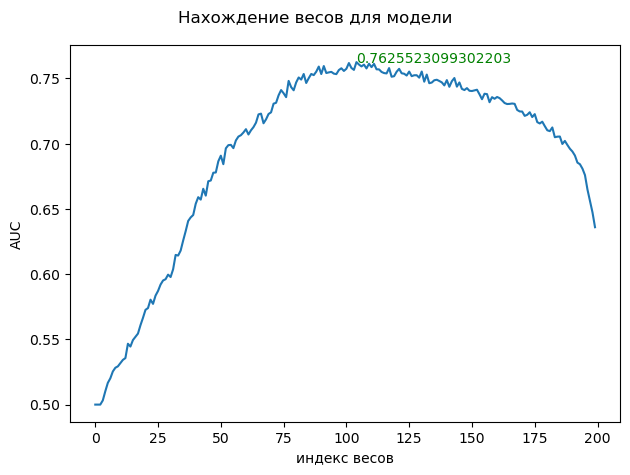

In [ ]:
i = pd.Series(auc_final)
best = np.array(auc_final).argmax()
print(auc_final[best])

x = i.index
y = i

# plot
fig, ax = plt.subplots()

ax.plot(x, y)

plt.text(best, auc_final[best], auc_final[best], color='g')

fig.suptitle('Нахождение весов для модели')
plt.ylabel('AUC')
plt.xlabel('индекс весов')
fig.tight_layout()
plt.show()


        roc_auc of predictions:       0.7389686795588633
        accuracy_test of predictions: 0.6848691695108078


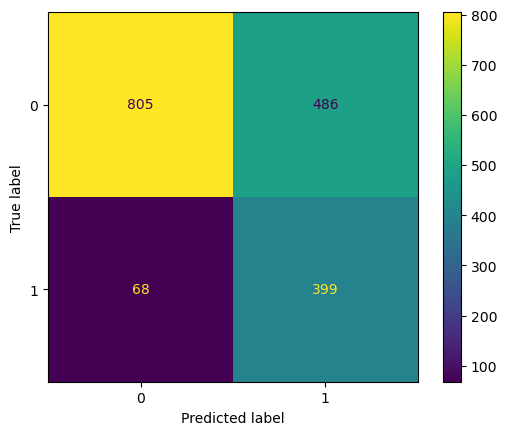

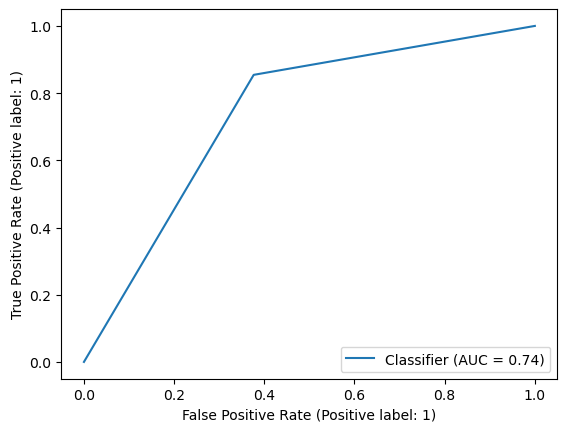

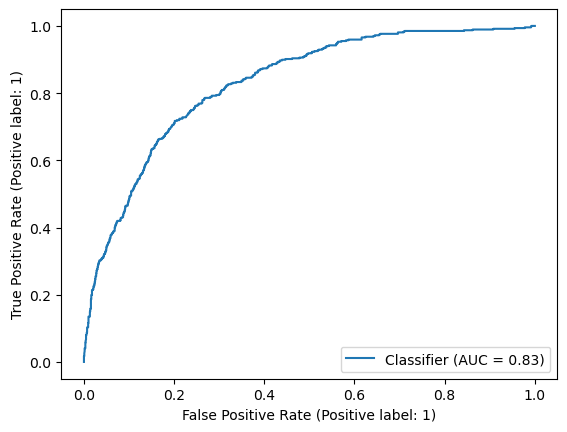

In [ ]:
# если используем алгоритм SVMSMOTE
# то вот идеальные весы для него с масимальным возможным AUC
weight1 = auc_final[best]

# initialize Pool
train_pool = Pool(features_train, 
                  target_train, cat_features=categorical_features, feature_names=list(features_train.columns))
test_pool = Pool(features_test, cat_features=categorical_features, feature_names=list(features_test.columns))

CatBC = CatBoostClassifier(
    early_stopping_rounds=5,
    class_weights=[1-weight1, weight1],
    random_state=seed
)

CatBC.fit(
    train_pool,
    verbose=False
)

# make the prediction using the resulting model
mentrics_eval(CatBC, features_test, target_test,1,1,1,1)

подбор весов для данного случая снизил метрику

## Optuna Forest optimisation


In [ ]:
features_train, features_test, target_train, target_test = manual_knn((df_contract, df_internet, df_personal, df_phone,), 
                                                                        categorical_features, 
                                                                        numeric_features,)

/tmp/ipykernel_4719/2934735090.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = df['TotalCharges'].astype('float')
/tmp/ipykernel_4719/2934735090.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['EndDate'], inplace=True)
/tmp/ipykernel_4719/545646823.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[train.notnull()] = np.sq

In [ ]:
def objective(trial):

    rf_criterion = trial.suggest_categorical("rf_criterion", ['gini', 'entropy', 'log_loss'])
    rf_n_estimators = trial.suggest_int("rf_n_estimators", 100, 1000, log=True)
    rf_max_depth = trial.suggest_int("rf_max_depth", 2, 20, log=True)
    rf_class_weight = trial.suggest_categorical("rf_class_weight", ['balanced', 'balanced_subsample'])
    
    classifier_obj = RandomForestClassifier(
        criterion=rf_criterion, max_depth=rf_max_depth, n_estimators=rf_n_estimators, class_weight=rf_class_weight
    )

    score = cross_val_score(classifier_obj, features_train, target_train, n_jobs=-1, scoring='roc_auc', cv=5)
    accuracy = score.mean()
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)
    print(study.best_trial)

[I 2022-09-15 13:01:08,148] A new study created in memory with name: no-name-b9277104-12be-49f7-a294-381f9406f679
[I 2022-09-15 13:01:10,185] Trial 0 finished with value: 0.8348964949249961 and parameters: {'rf_criterion': 'gini', 'rf_n_estimators': 443, 'rf_max_depth': 2, 'rf_class_weight': 'balanced'}. Best is trial 0 with value: 0.8348964949249961.
[I 2022-09-15 13:01:12,052] Trial 1 finished with value: 0.9418211938056107 and parameters: {'rf_criterion': 'entropy', 'rf_n_estimators': 382, 'rf_max_depth': 12, 'rf_class_weight': 'balanced'}. Best is trial 1 with value: 0.9418211938056107.
[I 2022-09-15 13:01:13,464] Trial 2 finished with value: 0.858272030592485 and parameters: {'rf_criterion': 'entropy', 'rf_n_estimators': 289, 'rf_max_depth': 6, 'rf_class_weight': 'balanced_subsample'}. Best is trial 1 with value: 0.9418211938056107.
[I 2022-09-15 13:01:14,801] Trial 3 finished with value: 0.8334885100908022 and parameters: {'rf_criterion': 'log_loss', 'rf_n_estimators': 387, 'rf_m

FrozenTrial(number=52, values=[0.9704014970726244], datetime_start=datetime.datetime(2022, 9, 15, 13, 2, 13, 505513), datetime_complete=datetime.datetime(2022, 9, 15, 13, 2, 16, 8023), params={'rf_criterion': 'gini', 'rf_n_estimators': 599, 'rf_max_depth': 19, 'rf_class_weight': 'balanced'}, distributions={'rf_criterion': CategoricalDistribution(choices=('gini', 'entropy', 'log_loss')), 'rf_n_estimators': IntDistribution(high=1000, log=True, low=100, step=1), 'rf_max_depth': IntDistribution(high=20, log=True, low=2, step=1), 'rf_class_weight': CategoricalDistribution(choices=('balanced', 'balanced_subsample'))}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=52, state=TrialState.COMPLETE, value=None)


Metrics:
roc_auc of predictions:       0.689411292476161
accuracy_test of predictions: 0.782707622298066


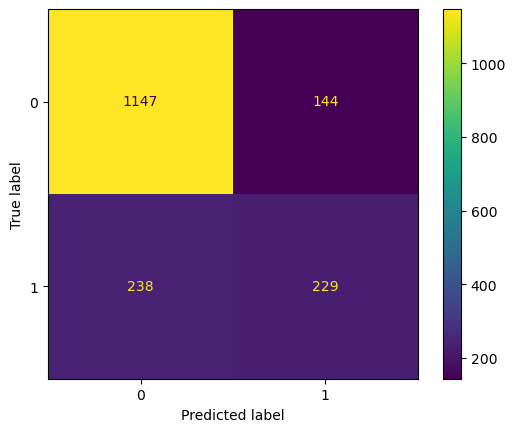

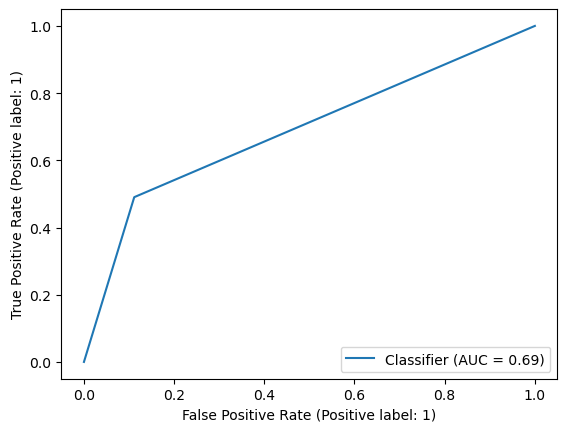

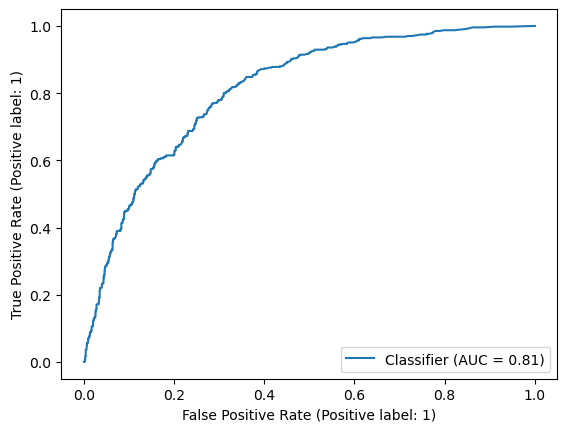

In [ ]:
test = RandomForestClassifier(
    criterion='gini',
    n_estimators=599,
    max_depth=19,
    class_weight='balanced',
    random_state=seed
)

test.fit(features_train, target_train)

mentrics_eval(test, features_test, target_test,1,1,1,1)

In [ ]:
if __name__ == "__main__":
    clf = RandomForestClassifier(random_state=seed)

    param_distributions = {
        "criterion": optuna.distributions.CategoricalDistribution(['gini', 'entropy', 'log_loss']),
        "n_estimators": optuna.distributions.IntDistribution(100, 1000, step=50),
        "max_depth": optuna.distributions.IntDistribution(1, 20, step=2),
        "class_weight": optuna.distributions.CategoricalDistribution(['balanced', 'balanced_subsample']),
        'min_samples_split': optuna.distributions.IntDistribution(2, 10, step=2),
        'min_samples_leaf': optuna.distributions.IntDistribution(1, 5),
    }

    optuna_search = optuna.integration.OptunaSearchCV(
        clf, param_distributions, n_trials=100, timeout=600, verbose=2
    )

    optuna_search.fit(features_train, target_train)

    print("Best trial:")
    trial = optuna_search.study_.best_trial

    print("  Value: ", trial.value)
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

/home/qq/miniconda3/lib/python3.9/site-packages/optuna/distributions.py:683: UserWarning: The distribution is specified by [1, 20] and step=2, but the range is not divisible by `step`. It will be replaced by [1, 19].
  warnings.warn(
/tmp/ipykernel_4607/1376622158.py:13: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search = optuna.integration.OptunaSearchCV(
[I 2022-09-15 12:43:03,534] A new study created in memory with name: no-name-f2efb785-3b26-4580-ad68-699622420d03
[I 2022-09-15 12:43:03,535] Searching the best hyperparameters using 8078 samples...
[I 2022-09-15 12:43:07,593] Trial 0 finished with value: 0.7737056677804004 and parameters: {'criterion': 'log_loss', 'n_estimators': 250, 'max_depth': 5, 'class_weight': 'balanced_subsample', 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.7737056677804004.
[I 2022-09-15 12:43:16,999] Trial 1 finished with value: 0.7525374735

Best trial:
  Value:  0.8958894031818042
  Params: 
    criterion: entropy
    n_estimators: 650
    max_depth: 19
    class_weight: balanced_subsample
    min_samples_split: 2
    min_samples_leaf: 1


Metrics:
roc_auc of predictions:       0.6909604791531555
accuracy_test of predictions: 0.7849829351535836


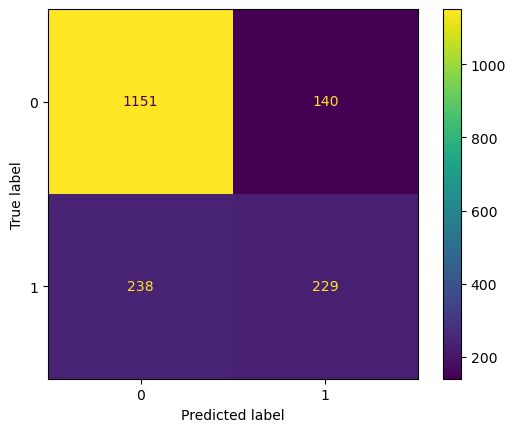

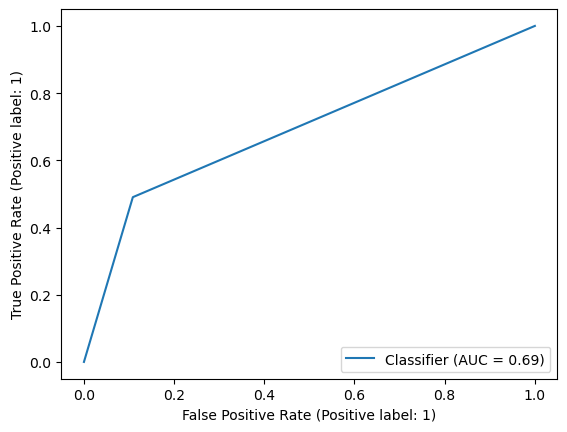

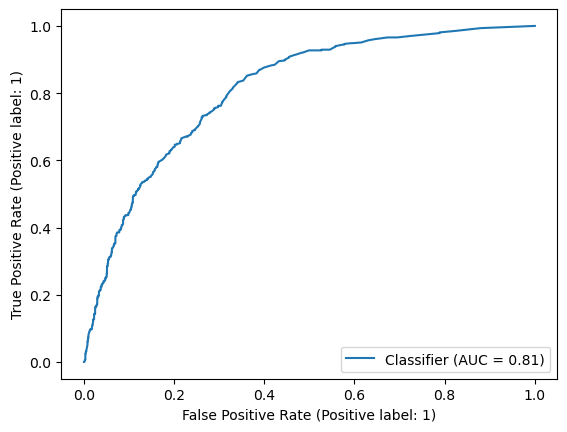

In [ ]:
test = RandomForestClassifier(
    criterion='gini',
    n_estimators=150,
    max_depth=21,
    class_weight='balanced',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=seed
)

test.fit(features_train, target_train)

mentrics_eval(test, features_test, target_test,1,1,1,1)

Metrics:
roc_auc of predictions:       0.687178738656852
accuracy_test of predictions: 0.7804323094425484


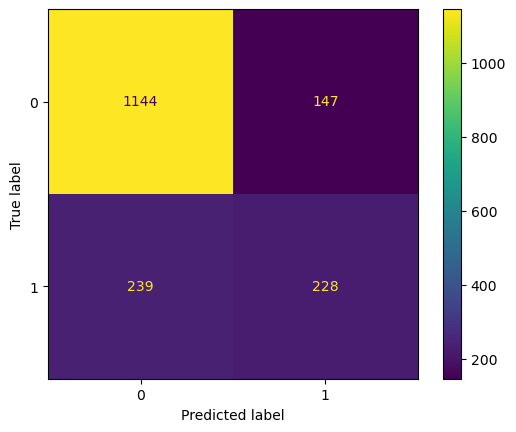

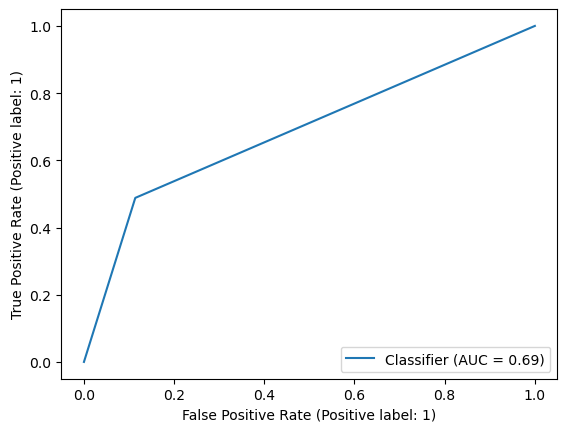

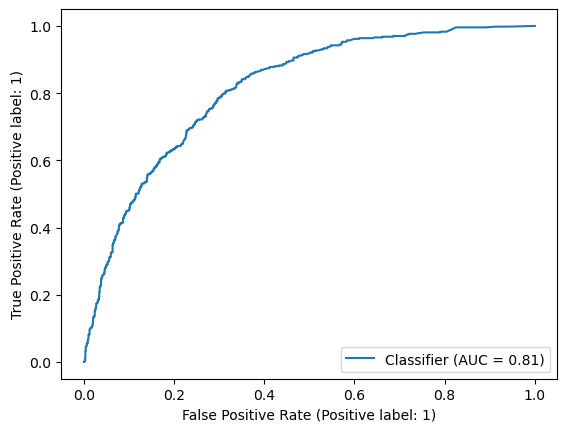

In [ ]:
test = RandomForestClassifier(
    criterion='entropy',
    n_estimators=650,
    max_depth=19,
    class_weight='balanced_subsample',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=seed
)

test.fit(features_train, target_train)

mentrics_eval(test, features_test, target_test,1,1,1,1)

## LightGBM

второй вариант бустинг модели

хотел посмотреть различия с CatBoost

в целом как с оптимизацией, так и общие настройки не дали большого прироста и какого то изменения в общей ситуации

In [ ]:
features_train, features_test, target_train, target_test = manual_knn((df_contract, df_internet, df_personal, df_phone,), 
                                                                        categorical_features, 
                                                                        numeric_features,)

/tmp/ipykernel_4719/2934735090.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = df['TotalCharges'].astype('float')
/tmp/ipykernel_4719/2934735090.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['EndDate'], inplace=True)
/tmp/ipykernel_4719/545646823.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[train.notnull()] = np.sq

[LightGBM] [Info] Number of positive: 1122, number of negative: 3097
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 385
[LightGBM] [Info] Number of data points in the train set: 4219, number of used features: 17
[LightGBM] [Info] Number of positive: 1122, number of negative: 3097
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 385
[LightGBM] [Info] Number of data points in the train set: 4219, number of used features: 17
[LightGBM] [Info] Number of positive: 1121, number of negative: 3098
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing 

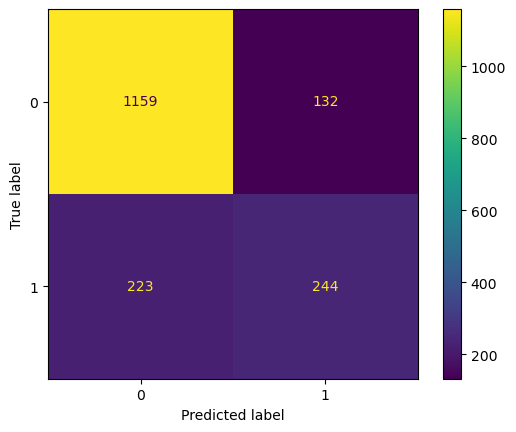

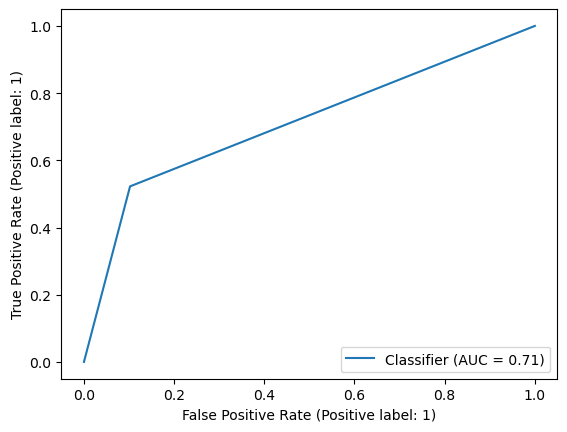

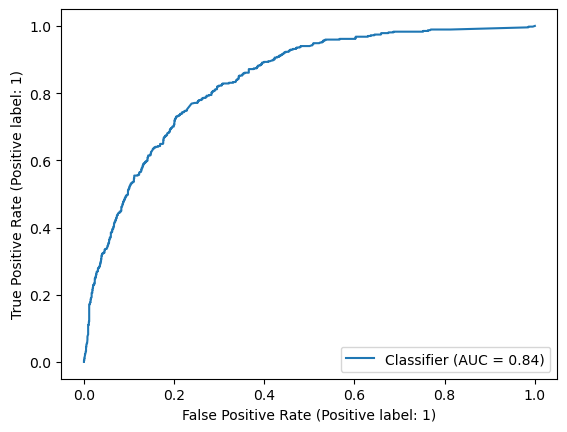

In [ ]:
# базовый lightGBM
lgb_train = lgb.Dataset(features_train, target_train)

params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'seed': seed
}

gbm = lgb.cv(params,
            lgb_train,
            nfold=5,
            callbacks=[lgb.early_stopping(stopping_rounds=5)],
            return_cvbooster=True)

y_pred = gbm.get('cvbooster').predict(features_test)

roc_auc_test = np.array([])
for i in range(len(y_pred)):
    predicts = list(map(treshhold, y_pred[i]))
    roc_auc_test = np.append(roc_auc_test, roc_auc_score(target_test, predicts))
print(f'roc_auc of prediction for {roc_auc_test.argmax()} booster:')
# берем предикшены лучшей модели
predicts = y_pred[roc_auc_test.argmax()]
mentrics_eval(target=target_test, predictions=predicts,base=1, matrix=1,roc=1, proba=1)

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[22]	cv_agg's auc: 0.844814 + 0.0128446
roc_auc of prediction for 0 booster:
roc_auc of predictions:       0.7271565458113077
accuracy_test of predictions: 0.7889647326507395


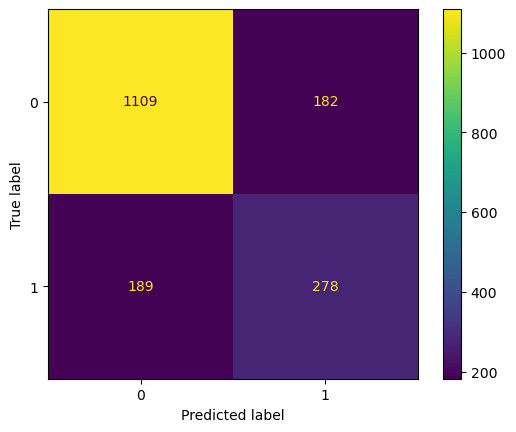

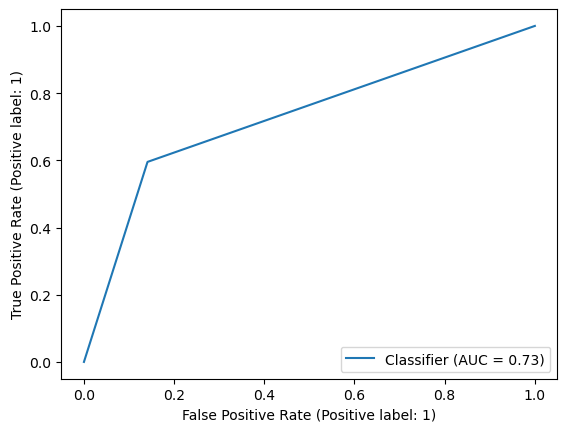

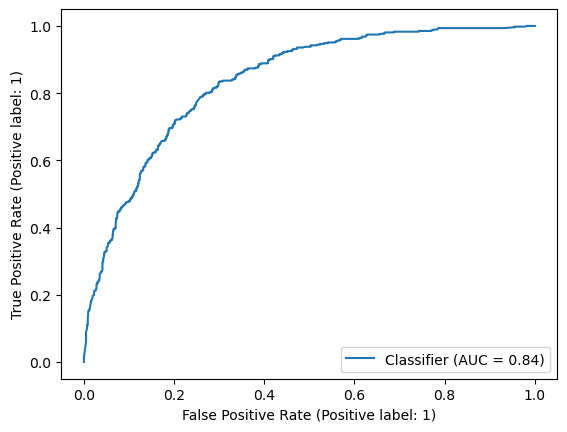

In [ ]:
# один из вариантов оптимизации гиперпараметров
lgb_train = lgb.Dataset(features_train, target_train)

params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'num_leaves': 31,
    'learning_rate': 0.03,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'force_col_wise': True,
    'seed': seed,
    'is_unbalance': True
}

gbm = lgb.cv(params,
            lgb_train,
            nfold=5,
            callbacks=[lgb.early_stopping(stopping_rounds=5)],
            return_cvbooster=True)

y_pred = gbm.get('cvbooster').predict(features_test)

roc_auc_test = np.array([])
for i in range(len(y_pred)):
    predicts = list(map(treshhold, y_pred[i]))
    roc_auc_test = np.append(roc_auc_test, roc_auc_score(target_test, predicts))
print(f'roc_auc of prediction for {roc_auc_test.argmax()} booster:')
# берем предикшены лучшей модели
predicts = y_pred[roc_auc_test.argmax()]
mentrics_eval(target=target_test, predictions=predicts,base=1, matrix=1,roc=1, proba=1)

### Optuna for LightGBM

In [ ]:
import optuna.integration.lightgbm as lgb

from lightgbm import early_stopping
from lightgbm import log_evaluation
import sklearn.datasets


if __name__ == "__main__":
    lgb_train = lgb.Dataset(features_train, target_train)

    params = {
        "objective": "binary",
        "metric": "auc",
        "verbosity": -1,
        "boosting_type": "gbdt",
    }

    tuner = lgb.LightGBMTunerCV(
        params,
        lgb_train,
        folds=StratifiedKFold(5, shuffle=True, random_state=seed),
        callbacks=[early_stopping(100), log_evaluation(100)],
        return_cvbooster=True
    )

    tuner.run()

    print("Best score:", tuner.best_score)
    best_params = tuner.best_params
    print("Best params:", best_params)
    print("  Params: ")
    for key, value in best_params.items():
        print("    {}: {}".format(key, value))

[I 2022-09-15 21:21:12,800] A new study created in memory with name: no-name-029cc694-5cf8-4db7-aac5-dd189b9f1d39
feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's auc: 0.909665 + 0.0100539
[200]	cv_agg's auc: 0.916107 + 0.00834536
[300]	cv_agg's auc: 0.916813 + 0.0082002


feature_fraction, val_score: 0.916985:  14%|#4        | 1/7 [00:01<00:11,  1.84s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.916985 + 0.00833065
[100]	cv_agg's auc: 0.908337 + 0.0104761
[200]	cv_agg's auc: 0.914262 + 0.00919007
[300]	cv_agg's auc: 0.915464 + 0.00906969


feature_fraction, val_score: 0.916985:  29%|##8       | 2/7 [00:03<00:09,  1.80s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.916985 + 0.00833065
[100]	cv_agg's auc: 0.905827 + 0.00926733
[200]	cv_agg's auc: 0.913495 + 0.00865165
[300]	cv_agg's auc: 0.91501 + 0.00803599


feature_fraction, val_score: 0.916985:  43%|####2     | 3/7 [00:05<00:06,  1.71s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.916985 + 0.00833065
[100]	cv_agg's auc: 0.906769 + 0.0106707
[200]	cv_agg's auc: 0.916479 + 0.00848684
[300]	cv_agg's auc: 0.918075 + 0.00828973
[400]	cv_agg's auc: 0.918289 + 0.00813397


feature_fraction, val_score: 0.918521:  57%|#####7    | 4/7 [00:07<00:05,  1.96s/it]

Early stopping, best iteration is:
[347]	cv_agg's auc: 0.918521 + 0.00803911
[100]	cv_agg's auc: 0.908356 + 0.0100733
[200]	cv_agg's auc: 0.915741 + 0.00851963
[300]	cv_agg's auc: 0.917845 + 0.00801546
[400]	cv_agg's auc: 0.916905 + 0.00841024


feature_fraction, val_score: 0.918521:  71%|#######1  | 5/7 [00:09<00:04,  2.04s/it]

Early stopping, best iteration is:
[347]	cv_agg's auc: 0.918521 + 0.00803911
[100]	cv_agg's auc: 0.909143 + 0.0094791
[200]	cv_agg's auc: 0.916547 + 0.00818494
[300]	cv_agg's auc: 0.916396 + 0.00830552


feature_fraction, val_score: 0.918521:  86%|########5 | 6/7 [00:11<00:02,  2.09s/it]

[400]	cv_agg's auc: 0.917102 + 0.00797242
Early stopping, best iteration is:
[347]	cv_agg's auc: 0.918521 + 0.00803911
[100]	cv_agg's auc: 0.90537 + 0.00895371
[200]	cv_agg's auc: 0.911461 + 0.0083159
[300]	cv_agg's auc: 0.91279 + 0.00724907
[400]	cv_agg's auc: 0.913649 + 0.00788155


feature_fraction, val_score: 0.918521: 100%|##########| 7/7 [00:15<00:00,  2.18s/it]


Early stopping, best iteration is:
[347]	cv_agg's auc: 0.918521 + 0.00803911


num_leaves, val_score: 0.918521:   0%|          | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's auc: 0.912937 + 0.00876109
[200]	cv_agg's auc: 0.913033 + 0.00884898
[300]	cv_agg's auc: 0.91113 + 0.0088765
[400]	cv_agg's auc: 0.90972 + 0.00919896


num_leaves, val_score: 0.918521:   5%|5         | 1/20 [00:07<02:19,  7.36s/it]

Early stopping, best iteration is:
[347]	cv_agg's auc: 0.918521 + 0.00803911
[100]	cv_agg's auc: 0.885352 + 0.0106309
[200]	cv_agg's auc: 0.897781 + 0.0109761
[300]	cv_agg's auc: 0.905226 + 0.00975706
[400]	cv_agg's auc: 0.909521 + 0.00985881


num_leaves, val_score: 0.918521:  10%|#         | 2/20 [00:08<01:04,  3.57s/it]

Early stopping, best iteration is:
[347]	cv_agg's auc: 0.918521 + 0.00803911
[100]	cv_agg's auc: 0.914342 + 0.00846185
[200]	cv_agg's auc: 0.914594 + 0.00875138
[300]	cv_agg's auc: 0.912608 + 0.00904567
[400]	cv_agg's auc: 0.911014 + 0.00907871


num_leaves, val_score: 0.918521:  15%|#5        | 3/20 [00:14<01:19,  4.68s/it]

Early stopping, best iteration is:
[347]	cv_agg's auc: 0.918521 + 0.00803911
[100]	cv_agg's auc: 0.914688 + 0.00847853
[200]	cv_agg's auc: 0.916844 + 0.00864899
[300]	cv_agg's auc: 0.915863 + 0.00848951
[400]	cv_agg's auc: 0.914098 + 0.00869125


num_leaves, val_score: 0.918521:  20%|##        | 4/20 [00:17<01:07,  4.19s/it]

Early stopping, best iteration is:
[347]	cv_agg's auc: 0.918521 + 0.00803911
[100]	cv_agg's auc: 0.914254 + 0.00886426
[200]	cv_agg's auc: 0.915982 + 0.0087337
[300]	cv_agg's auc: 0.915078 + 0.0089504
[400]	cv_agg's auc: 0.913084 + 0.00927924


num_leaves, val_score: 0.918521:  25%|##5       | 5/20 [00:24<01:15,  5.04s/it]

Early stopping, best iteration is:
[347]	cv_agg's auc: 0.918521 + 0.00803911
[100]	cv_agg's auc: 0.885352 + 0.0106309
[200]	cv_agg's auc: 0.897781 + 0.0109761
[300]	cv_agg's auc: 0.905226 + 0.00975706
[400]	cv_agg's auc: 0.909521 + 0.00985881


num_leaves, val_score: 0.918521:  30%|###       | 6/20 [00:27<01:01,  4.36s/it]

Early stopping, best iteration is:
[347]	cv_agg's auc: 0.918521 + 0.00803911
[100]	cv_agg's auc: 0.913091 + 0.00886453
[200]	cv_agg's auc: 0.913022 + 0.00914838
[300]	cv_agg's auc: 0.911205 + 0.00885063
[400]	cv_agg's auc: 0.909309 + 0.00917778


num_leaves, val_score: 0.918521:  35%|###5      | 7/20 [00:36<01:17,  5.98s/it]

Early stopping, best iteration is:
[347]	cv_agg's auc: 0.918521 + 0.00803911
[100]	cv_agg's auc: 0.913405 + 0.00906467
[200]	cv_agg's auc: 0.913541 + 0.00925829
[300]	cv_agg's auc: 0.911685 + 0.0091964
[400]	cv_agg's auc: 0.910061 + 0.00920268


num_leaves, val_score: 0.918521:  40%|####      | 8/20 [00:42<01:12,  6.03s/it]

Early stopping, best iteration is:
[347]	cv_agg's auc: 0.918521 + 0.00803911
[100]	cv_agg's auc: 0.91451 + 0.00984604
[200]	cv_agg's auc: 0.915889 + 0.0100048
[300]	cv_agg's auc: 0.915537 + 0.00971793
[400]	cv_agg's auc: 0.913643 + 0.00960957


num_leaves, val_score: 0.918521:  45%|####5     | 9/20 [00:46<00:59,  5.44s/it]

Early stopping, best iteration is:
[347]	cv_agg's auc: 0.918521 + 0.00803911
[100]	cv_agg's auc: 0.914342 + 0.00846185
[200]	cv_agg's auc: 0.914594 + 0.00875138
[300]	cv_agg's auc: 0.912608 + 0.00904567
[400]	cv_agg's auc: 0.911014 + 0.00907871


num_leaves, val_score: 0.918521:  50%|#####     | 10/20 [00:52<00:55,  5.53s/it]

Early stopping, best iteration is:
[347]	cv_agg's auc: 0.918521 + 0.00803911
[100]	cv_agg's auc: 0.914431 + 0.00924673
[200]	cv_agg's auc: 0.916763 + 0.0094297
[300]	cv_agg's auc: 0.916409 + 0.00888271
[400]	cv_agg's auc: 0.914604 + 0.00866446


num_leaves, val_score: 0.918521:  55%|#####5    | 11/20 [00:55<00:42,  4.74s/it]

Early stopping, best iteration is:
[347]	cv_agg's auc: 0.918521 + 0.00803911
[100]	cv_agg's auc: 0.913067 + 0.00970641
[200]	cv_agg's auc: 0.916802 + 0.00895872
[300]	cv_agg's auc: 0.917381 + 0.00925187
[400]	cv_agg's auc: 0.916301 + 0.00874175


num_leaves, val_score: 0.918521:  60%|######    | 12/20 [00:58<00:32,  4.11s/it]

Early stopping, best iteration is:
[347]	cv_agg's auc: 0.918521 + 0.00803911
[100]	cv_agg's auc: 0.912165 + 0.0094647
[200]	cv_agg's auc: 0.918017 + 0.00931297
[300]	cv_agg's auc: 0.918367 + 0.00933808


num_leaves, val_score: 0.918879:  65%|######5   | 13/20 [01:00<00:24,  3.45s/it]

Early stopping, best iteration is:
[263]	cv_agg's auc: 0.918879 + 0.00940584
[100]	cv_agg's auc: 0.912271 + 0.00853015
[200]	cv_agg's auc: 0.917683 + 0.00873922
[300]	cv_agg's auc: 0.918786 + 0.00851878


num_leaves, val_score: 0.919022:  70%|#######   | 14/20 [01:02<00:17,  2.97s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.910992 + 0.00926348
[200]	cv_agg's auc: 0.917281 + 0.00873142
[300]	cv_agg's auc: 0.918199 + 0.00807414


num_leaves, val_score: 0.919022:  75%|#######5  | 15/20 [01:03<00:12,  2.56s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.910231 + 0.00896819
[200]	cv_agg's auc: 0.917098 + 0.00839137
[300]	cv_agg's auc: 0.918724 + 0.00898365


num_leaves, val_score: 0.919022:  80%|########  | 16/20 [01:05<00:09,  2.26s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.914085 + 0.00872579
[200]	cv_agg's auc: 0.915013 + 0.00882474
[300]	cv_agg's auc: 0.913626 + 0.00894298


num_leaves, val_score: 0.919022:  85%|########5 | 17/20 [01:09<00:08,  2.92s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.910401 + 0.0101148
[200]	cv_agg's auc: 0.917101 + 0.00929397
[300]	cv_agg's auc: 0.917843 + 0.00871537


num_leaves, val_score: 0.919022:  90%|######### | 18/20 [01:12<00:05,  2.81s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.914153 + 0.00900714
[200]	cv_agg's auc: 0.916316 + 0.00909789
[300]	cv_agg's auc: 0.916239 + 0.00952134


num_leaves, val_score: 0.919022:  95%|#########5| 19/20 [01:15<00:02,  2.87s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.914149 + 0.00945306
[200]	cv_agg's auc: 0.914914 + 0.00918137
[300]	cv_agg's auc: 0.913999 + 0.00906815


num_leaves, val_score: 0.919022: 100%|##########| 20/20 [01:21<00:00,  4.06s/it]


Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016


bagging, val_score: 0.919022:   0%|          | 0/10 [00:00<?, ?it/s]

[100]	cv_agg's auc: 0.909883 + 0.0098031
[200]	cv_agg's auc: 0.915928 + 0.00925644
[300]	cv_agg's auc: 0.916719 + 0.00872614


bagging, val_score: 0.919022:  10%|#         | 1/10 [00:02<00:21,  2.35s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.907557 + 0.0111616
[200]	cv_agg's auc: 0.91161 + 0.0110545
[300]	cv_agg's auc: 0.913063 + 0.00995757


bagging, val_score: 0.919022:  20%|##        | 2/10 [00:04<00:18,  2.31s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.909394 + 0.00843015
[200]	cv_agg's auc: 0.91383 + 0.00814684
[300]	cv_agg's auc: 0.915615 + 0.00837641


bagging, val_score: 0.919022:  30%|###       | 3/10 [00:06<00:15,  2.26s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.907924 + 0.00794679
[200]	cv_agg's auc: 0.914396 + 0.00802006
[300]	cv_agg's auc: 0.91518 + 0.00833336


bagging, val_score: 0.919022:  40%|####      | 4/10 [00:09<00:13,  2.25s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.900024 + 0.00945373
[200]	cv_agg's auc: 0.908477 + 0.00766082
[300]	cv_agg's auc: 0.909741 + 0.00766476


bagging, val_score: 0.919022:  50%|#####     | 5/10 [00:11<00:11,  2.28s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.905834 + 0.00851343
[200]	cv_agg's auc: 0.910375 + 0.00837997
[300]	cv_agg's auc: 0.911325 + 0.00948361


bagging, val_score: 0.919022:  60%|######    | 6/10 [00:15<00:12,  3.02s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.898044 + 0.00922325
[200]	cv_agg's auc: 0.905708 + 0.00823988
[300]	cv_agg's auc: 0.909424 + 0.00648005


bagging, val_score: 0.919022:  70%|#######   | 7/10 [00:18<00:08,  2.87s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.912271 + 0.00853015
[200]	cv_agg's auc: 0.917683 + 0.00873922
[300]	cv_agg's auc: 0.918786 + 0.00851878


bagging, val_score: 0.919022:  80%|########  | 8/10 [00:20<00:05,  2.58s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.907659 + 0.00988025
[200]	cv_agg's auc: 0.912095 + 0.00963169
[300]	cv_agg's auc: 0.91309 + 0.00965499


bagging, val_score: 0.919022:  90%|######### | 9/10 [00:22<00:02,  2.57s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.906438 + 0.00952252
[200]	cv_agg's auc: 0.912358 + 0.00898972
[300]	cv_agg's auc: 0.913288 + 0.00867522


bagging, val_score: 0.919022: 100%|##########| 10/10 [00:25<00:00,  2.55s/it]


Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016


feature_fraction_stage2, val_score: 0.919022:   0%|          | 0/3 [00:00<?, ?it/s]

[100]	cv_agg's auc: 0.911841 + 0.00892701
[200]	cv_agg's auc: 0.917291 + 0.00911617
[300]	cv_agg's auc: 0.917414 + 0.0090408


feature_fraction_stage2, val_score: 0.919022:  33%|###3      | 1/3 [00:01<00:03,  1.78s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.911841 + 0.00892701
[200]	cv_agg's auc: 0.917291 + 0.00911617
[300]	cv_agg's auc: 0.917414 + 0.0090408


feature_fraction_stage2, val_score: 0.919022:  67%|######6   | 2/3 [00:03<00:01,  1.87s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.912271 + 0.00853015
[200]	cv_agg's auc: 0.917683 + 0.00873922
[300]	cv_agg's auc: 0.918786 + 0.00851878


feature_fraction_stage2, val_score: 0.919022: 100%|##########| 3/3 [00:06<00:00,  2.17s/it]


Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016


regularization_factors, val_score: 0.919022:   0%|          | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's auc: 0.909215 + 0.0102425
[200]	cv_agg's auc: 0.915636 + 0.00950555
[300]	cv_agg's auc: 0.916877 + 0.00957451


regularization_factors, val_score: 0.919022:   5%|5         | 1/20 [00:02<00:39,  2.06s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.906273 + 0.00995263
[200]	cv_agg's auc: 0.913561 + 0.00963129
[300]	cv_agg's auc: 0.915618 + 0.00916674


regularization_factors, val_score: 0.919022:  10%|#         | 2/20 [00:03<00:35,  1.96s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.911225 + 0.0103347
[200]	cv_agg's auc: 0.916543 + 0.00981818
[300]	cv_agg's auc: 0.917125 + 0.00929079


regularization_factors, val_score: 0.919022:  15%|#5        | 3/20 [00:05<00:31,  1.84s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.911022 + 0.00959574
[200]	cv_agg's auc: 0.916845 + 0.00910487
[300]	cv_agg's auc: 0.91819 + 0.00872005


regularization_factors, val_score: 0.919022:  20%|##        | 4/20 [00:07<00:29,  1.83s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.911455 + 0.00911289
[200]	cv_agg's auc: 0.916921 + 0.00880607
[300]	cv_agg's auc: 0.918119 + 0.00885497


regularization_factors, val_score: 0.919022:  25%|##5       | 5/20 [00:09<00:26,  1.78s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.911945 + 0.0100368
[200]	cv_agg's auc: 0.917201 + 0.00873717
[300]	cv_agg's auc: 0.918029 + 0.00833336


regularization_factors, val_score: 0.919022:  30%|###       | 6/20 [00:10<00:24,  1.78s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.910222 + 0.00916872
[200]	cv_agg's auc: 0.915241 + 0.00854107
[300]	cv_agg's auc: 0.916726 + 0.00805588


regularization_factors, val_score: 0.919022:  35%|###5      | 7/20 [00:12<00:22,  1.77s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.91121 + 0.00984762
[200]	cv_agg's auc: 0.916288 + 0.00906434
[300]	cv_agg's auc: 0.916908 + 0.00941452


regularization_factors, val_score: 0.919022:  40%|####      | 8/20 [00:14<00:20,  1.74s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.910937 + 0.00957339
[200]	cv_agg's auc: 0.917219 + 0.00869173
[300]	cv_agg's auc: 0.918274 + 0.00875349


regularization_factors, val_score: 0.919022:  45%|####5     | 9/20 [00:17<00:23,  2.13s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.911838 + 0.0102193
[200]	cv_agg's auc: 0.917347 + 0.00921958
[300]	cv_agg's auc: 0.918107 + 0.00921061


regularization_factors, val_score: 0.919022:  50%|#####     | 10/20 [00:19<00:20,  2.03s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.892434 + 0.0117745
[200]	cv_agg's auc: 0.898103 + 0.0114198


regularization_factors, val_score: 0.919022:  55%|#####5    | 11/20 [00:20<00:15,  1.77s/it]

[300]	cv_agg's auc: 0.899671 + 0.0112656
Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.911709 + 0.0102936
[200]	cv_agg's auc: 0.917695 + 0.00922843
[300]	cv_agg's auc: 0.918526 + 0.00920009


regularization_factors, val_score: 0.919022:  60%|######    | 12/20 [00:22<00:13,  1.75s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.910985 + 0.00990299
[200]	cv_agg's auc: 0.916704 + 0.00903301
[300]	cv_agg's auc: 0.917748 + 0.00925016


regularization_factors, val_score: 0.919022:  65%|######5   | 13/20 [00:23<00:12,  1.76s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.912547 + 0.00893532
[200]	cv_agg's auc: 0.916987 + 0.00877587
[300]	cv_agg's auc: 0.918479 + 0.00866145


regularization_factors, val_score: 0.919022:  70%|#######   | 14/20 [00:25<00:10,  1.78s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.911959 + 0.0089421
[200]	cv_agg's auc: 0.9174 + 0.00817927
[300]	cv_agg's auc: 0.918407 + 0.0083062


regularization_factors, val_score: 0.919022:  75%|#######5  | 15/20 [00:27<00:08,  1.77s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.910438 + 0.010012
[200]	cv_agg's auc: 0.916402 + 0.00971794
[300]	cv_agg's auc: 0.917161 + 0.00938804


regularization_factors, val_score: 0.919022:  80%|########  | 16/20 [00:29<00:06,  1.74s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.911878 + 0.0096992
[200]	cv_agg's auc: 0.918007 + 0.00908016
[300]	cv_agg's auc: 0.918711 + 0.00896927


regularization_factors, val_score: 0.919022:  85%|########5 | 17/20 [00:30<00:05,  1.75s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.911524 + 0.00922278
[200]	cv_agg's auc: 0.917211 + 0.00903545
[300]	cv_agg's auc: 0.918019 + 0.0092824


regularization_factors, val_score: 0.919022:  90%|######### | 18/20 [00:32<00:03,  1.78s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.912086 + 0.00902904
[200]	cv_agg's auc: 0.917023 + 0.00916199
[300]	cv_agg's auc: 0.917917 + 0.00880412


regularization_factors, val_score: 0.919022:  95%|#########5| 19/20 [00:34<00:01,  1.79s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.911382 + 0.010295
[200]	cv_agg's auc: 0.916881 + 0.00888077
[300]	cv_agg's auc: 0.91791 + 0.00861552


regularization_factors, val_score: 0.919022: 100%|##########| 20/20 [00:36<00:00,  1.81s/it]


Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016


min_data_in_leaf, val_score: 0.919022:   0%|          | 0/5 [00:00<?, ?it/s]

[100]	cv_agg's auc: 0.896359 + 0.0115889
[200]	cv_agg's auc: 0.904885 + 0.0109668
[300]	cv_agg's auc: 0.909214 + 0.00981752


min_data_in_leaf, val_score: 0.919022:  20%|##        | 1/5 [00:01<00:06,  1.56s/it]

Early stopping, best iteration is:
[267]	cv_agg's auc: 0.919022 + 0.00845016
[100]	cv_agg's auc: 0.913278 + 0.00905147
[200]	cv_agg's auc: 0.92083 + 0.00782736
[300]	cv_agg's auc: 0.922155 + 0.00767489


min_data_in_leaf, val_score: 0.922258:  40%|####      | 2/5 [00:03<00:05,  1.85s/it]

Early stopping, best iteration is:
[296]	cv_agg's auc: 0.922258 + 0.00777364
[100]	cv_agg's auc: 0.913165 + 0.00909122
[200]	cv_agg's auc: 0.920924 + 0.00816455
[300]	cv_agg's auc: 0.92322 + 0.00749125


min_data_in_leaf, val_score: 0.923555:  60%|######    | 3/5 [00:06<00:04,  2.45s/it]

[400]	cv_agg's auc: 0.923376 + 0.00791929
Early stopping, best iteration is:
[311]	cv_agg's auc: 0.923555 + 0.00735326
[100]	cv_agg's auc: 0.910172 + 0.00983616
[200]	cv_agg's auc: 0.915858 + 0.00906623
[300]	cv_agg's auc: 0.91697 + 0.00894087


min_data_in_leaf, val_score: 0.923555:  80%|########  | 4/5 [00:10<00:02,  2.92s/it]

[400]	cv_agg's auc: 0.916527 + 0.00894927
Early stopping, best iteration is:
[311]	cv_agg's auc: 0.923555 + 0.00735326
[100]	cv_agg's auc: 0.902283 + 0.0104533
[200]	cv_agg's auc: 0.910283 + 0.00964306
[300]	cv_agg's auc: 0.913087 + 0.00839896


min_data_in_leaf, val_score: 0.923555: 100%|##########| 5/5 [00:12<00:00,  2.50s/it]

[400]	cv_agg's auc: 0.91375 + 0.00841179
Early stopping, best iteration is:
[311]	cv_agg's auc: 0.923555 + 0.00735326
Best score: 0.9235546741982652
Best params: {'objective': 'binary', 'metric': 'auc', 'verbosity': -1, 'boosting_type': 'gbdt', 'feature_pre_filter': False, 'lambda_l1': 0.0, 'lambda_l2': 0.0, 'num_leaves': 47, 'feature_fraction': 0.4, 'bagging_fraction': 1.0, 'bagging_freq': 0, 'min_child_samples': 5}
  Params: 
    objective: binary
    metric: auc
    verbosity: -1
    boosting_type: gbdt
    feature_pre_filter: False
    lambda_l1: 0.0
    lambda_l2: 0.0
    num_leaves: 47
    feature_fraction: 0.4
    bagging_fraction: 1.0
    bagging_freq: 0
    min_child_samples: 5


[LightGBM] [Warning] verbosity is set=-1, verbose=0 will be ignored. Current value: verbosity=-1
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[17]	cv_agg's auc: 0.841923 + 0.0113105
roc_auc of prediction for 0 booster: 0.7585433332725159
roc_auc of predictions:       0.7585433332725159
accuracy_test of predictions: 0.7627986348122867


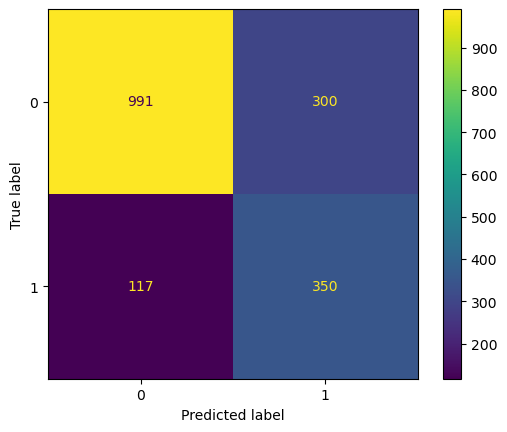

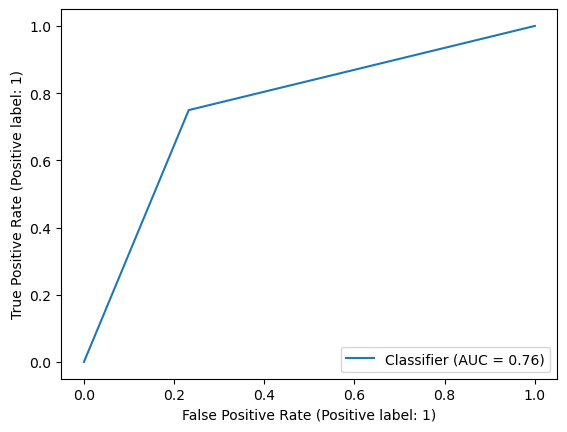

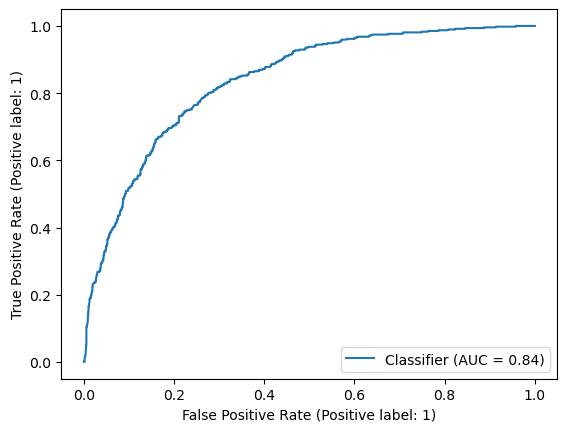

In [ ]:
# light_gbm = tuner.get_best_booster()

params = {'objective': 'binary',
        'metric': 'auc',
        'verbosity': -1, 
        'boosting_type': 'gbdt',
        'feature_pre_filter': False,
        'lambda_l1': 0.0,
        'lambda_l2': 0.0,
        'num_leaves': 47,
        'feature_fraction': 0.4,
        'bagging_fraction': 1.0,
        'bagging_freq': 0,
        'min_child_samples': 5,
        'is_unbalance': True,
        'seed': seed,}

gbm = lgb.cv(params,
            lgb_train,
            nfold=5,
            callbacks=[lgb.early_stopping(stopping_rounds=5)],
            return_cvbooster=True)

y_pred = gbm.get('cvbooster').predict(features_test)


roc_auc_test = np.array([])
for i in range(len(y_pred)):
    predicts = list(map(treshhold, y_pred[i]))
    roc_auc_test = np.append(roc_auc_test, roc_auc_score(target_test, predicts))
print(f'roc_auc of prediction for {roc_auc_test.argmax()} booster: {roc_auc_test.max()}')
# берем предикшены лучшей модели
predicts = y_pred[roc_auc_test.argmax()]
mentrics_eval(target=target_test, predictions=predicts,base=1, matrix=1,roc=1, proba=1)

### лучшая модель

эта часть была написана до того, как попробовал оптимизировать весы для CatBoost и на тот момент это была моделью с лучшей метрикой

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[59]	cv_agg's auc: 0.849041 + 0.0129515
roc_auc of prediction for 2 booster: 0.7635300888874882
roc_auc of predictions:       0.7635300888874882
accuracy_test of predictions: 0.7440273037542662


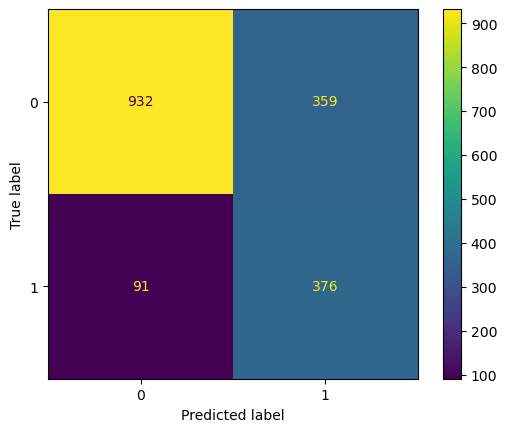

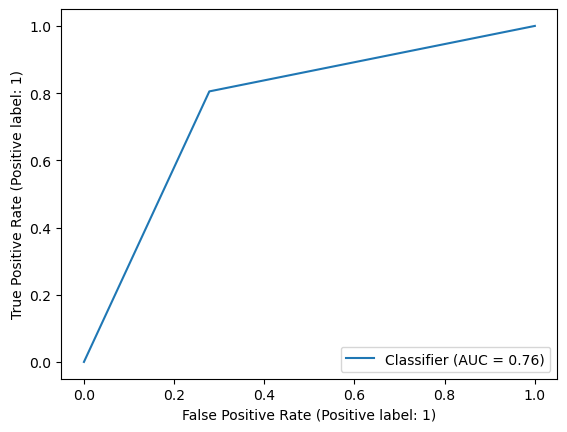

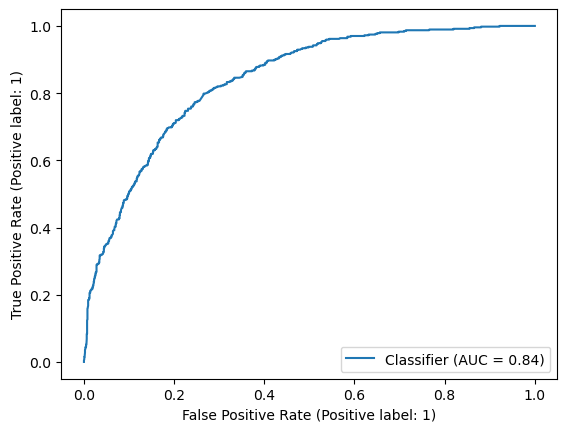

In [ ]:
# create dataset for lightgbm
lgb_train = lgb.Dataset(features_train, target_train)


# specify your configurations as a dict
params = {
    'objective': 'binary',
    'metric': 'auc',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 4,
    'min_data_in_leaf': 18,
    'seed': seed,
    'is_unbalance': True,
}

gbm = lgb.cv(params,
            lgb_train,
            nfold=10,
            callbacks=[lgb.early_stopping(stopping_rounds=5)],
            return_cvbooster=True)

y_pred = gbm.get('cvbooster').predict(features_test)

roc_auc_test = np.array([])
for i in range(len(y_pred)):
    predicts = list(map(treshhold, y_pred[i]))
    roc_auc_test = np.append(roc_auc_test, roc_auc_score(target_test, predicts))
print(f'roc_auc of prediction for {roc_auc_test.argmax()} booster: {roc_auc_test.max()}')
# берем предикшены лучшей модели
predicts = y_pred[roc_auc_test.argmax()]
mentrics_eval(target=target_test, predictions=predicts,base=1, matrix=1,roc=1, proba=1)
    

## XGBoost

In [ ]:
dtrain = xgb.DMatrix(features_train, label=target_train)
dtest = xgb.DMatrix(features_test)

In [ ]:
param = {
    'max_depth': 4, 
    # 'eta': 1,
    # 'objective': 'binary:logistic',
    'eval_metric': 'auc',
    # 'sampling_method': 'gradient_based',
    # 'max_bin': 5000,
    # 'subsample': ,
    # 'colsample_bytree':0.75,
    # 'objective': 'binary:hinge',

}

In [ ]:
xgb.cv(param, dtrain, nfold=10, stratified=True, metrics='auc', seed=seed)

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.840370,0.001849,0.825823,0.017242
1,0.847027,0.002494,0.834117,0.016710
2,0.851757,0.002385,0.835900,0.016119
3,0.856826,0.001621,0.839074,0.015483
4,0.860164,0.002247,0.840764,0.014658
5,0.863721,0.002029,0.842197,0.013868
6,0.866695,0.001774,0.843263,0.014561
7,0.869453,0.001651,0.844053,0.013480
8,0.871726,0.001829,0.843834,0.013729
9,0.873593,0.001597,0.843686,0.013519


In [ ]:
num_round = 20
bst = xgb.train(param, dtrain, num_round)

roc_auc of predictions:       0.7121913029920534
accuracy_test of predictions: 0.7940841865756542


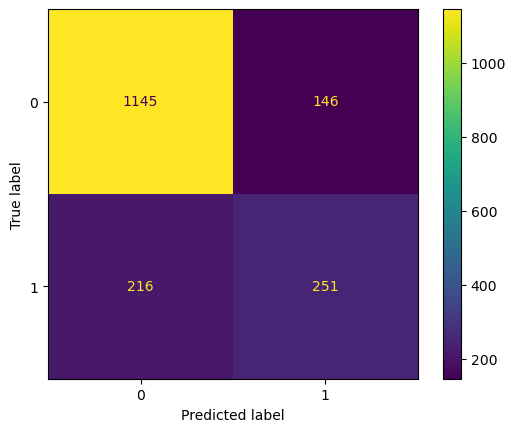

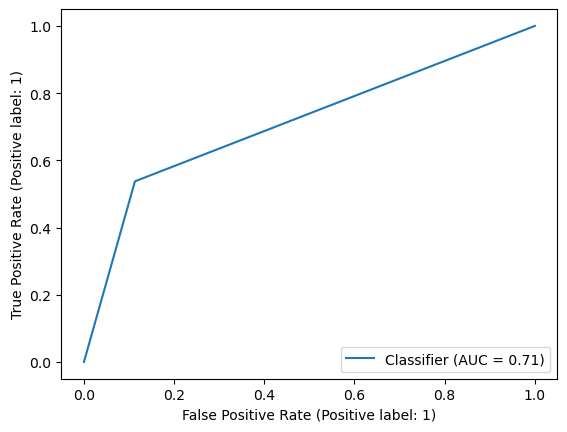

In [ ]:
mentrics_eval(bst, dtest, target_test,1,1,1,1)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

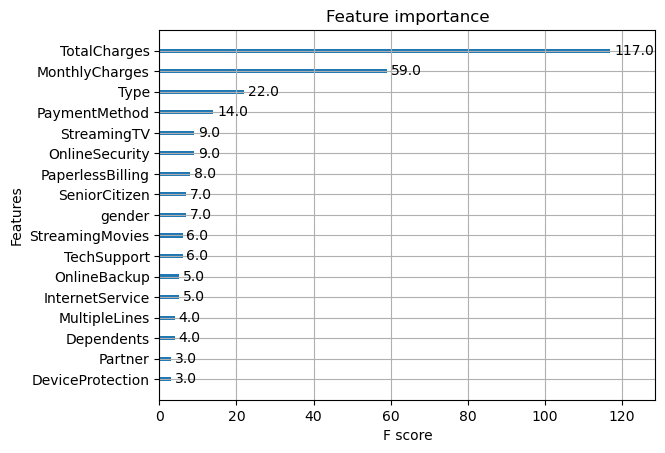

In [ ]:
xgb.plot_importance(bst)

### Оптимизация количества деревьев

In [ ]:
rounds = np.arange(0,100,1)
auc_final = []

In [ ]:
for i in rounds:
    param = {
    # 'max_depth': 3, 
    # 'eta': 1,
    # 'objective': 'binary:logistic',
    'eval_metric': 'auc',
    # 'sampling_method': 'gradient_based',
    # 'max_bin': 5000,
    # 'subsample': ,
    # 'colsample_bytree':0.75,
    'objective': 'binary:hinge',

    }
    num_round = i
    bst = xgb.train(param, dtrain, num_round)


    ypred = bst.predict(dtest)
    auc_final.append(roc_auc_score(target_test, ypred))

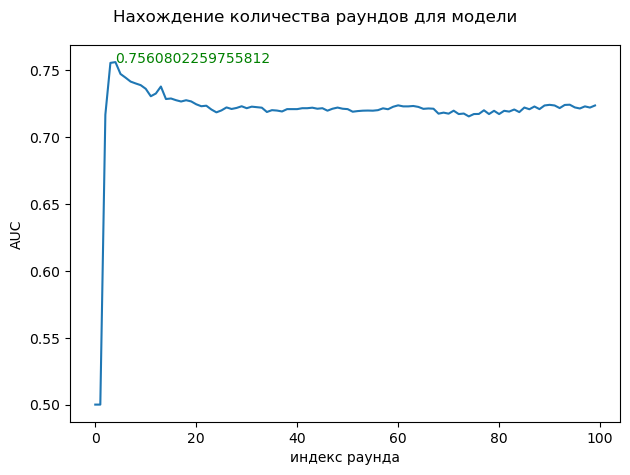

In [ ]:
i = pd.Series(auc_final)
best = np.array(auc_final).argmax()

x = i.index
y = i

# plot
fig, ax = plt.subplots()

ax.plot(x, y)

plt.text(best, auc_final[best], auc_final[best], color='g')

fig.suptitle('Нахождение количества раундов для модели')
plt.ylabel('AUC')
plt.xlabel('индекс раунда')
fig.tight_layout()
plt.show()

roc_auc of predictions:       0.7560802259755812
accuracy_test of predictions: 0.7320819112627986


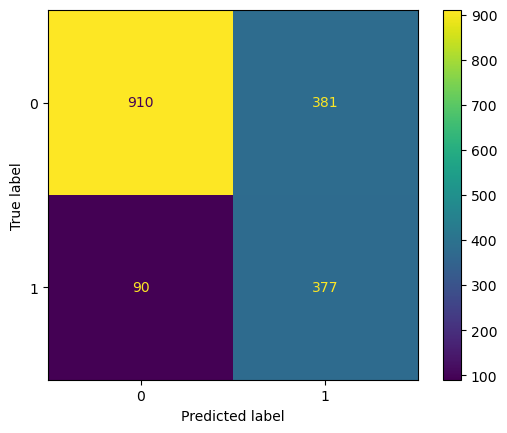

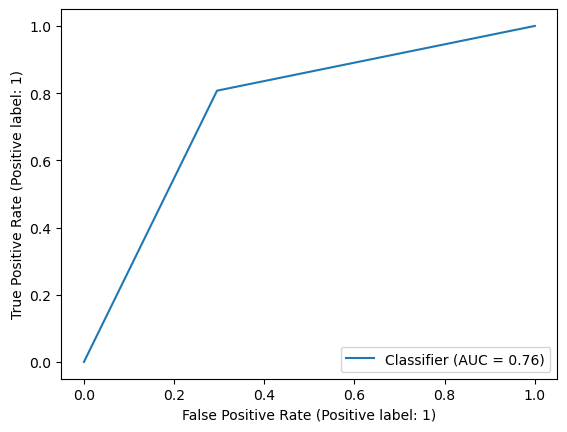

In [ ]:
num_round = best
bst = xgb.train(param, dtrain, num_round)

mentrics_eval(bst, dtest, target_test,1,1,1,1)

# Выводы

В исследовании было проведено:
- предобработка данных:
    - использование KNN для заполнения пропущенных данных
    - непрерывные признаки были нормализованы с помощью алгоритма MinMax
- обучение базовых моделей
    - DecisionTree
    - Forest
    - LogisticRegressor
- обучение бустинговых моделей:
    - CatBoost
    - LightGMB
    - XGBoost
- так же было проведено:
    - оценка важности признаков на моделях
        - базовых моделях
        - СatBoost
    - были проведены эксперименты с алгоритмами апсемплинга с последующим использованием CatBoost
        - AllKNN
        - SMOTE
        - SVMSMOTE
        - ADASYN
    - поиск весов для CatBoost
    - использование Optuna для оптимизации гиперпараметров в моделях
        - Forest
        - LightGBM

AUC моделей:
- Tree: 
    - plain — 0.732
    - stritifaid — 0.743
    - features optimisation — 0.730
- Forest: 
    - plain — 0.757
    - stritifaid — 0.760
    - features optimisation — 0.752
    - optuna optimisation:
        - 0.689
        - 0.690
        - 0.687
- Logistic:
    - plain — 0.745
    - stritifaid — 0.745
    - features optimisation — 0.741
- CatBoost
    - plain — 0.765
    - с апсемплингом AllKNN — 0.752
    - с апсемплингом SMOTE — 0.755
    - с апсемплингом SVMSMOTE — 0.754
    - с апсемплингом ADASYN — 0.753
    - алгоритм семплинга SMOTETomek — 0.755
    - оптимизация признаков — 0.745
    - оптимизация весов — 0.766
    - оптимизация весов при использовании алгоритма апсемплинга SVMSMOTE — 0.738
- LightGBM
    - plain — 0.710
    - variant — 0.727
    - stratify optuna — 0.758
    - manual tune — 0.763
- XGBoost
    - plain — 0.712
    - tree optimisation — 0.756

Большинство моделей имеют большое количество ложно положительных предсказаний, что предполагает, что либо нужен иной подход к обучению, либо доработка датасета.
Но при этом ложно отрицательных вариантов минимальное количество по отношению к ложно положительным, в рамках нашей задачи, скорее, можно сказать что это положительный вариант, так как компания не оставит уходящего клиента без предложения в большинстве случаев.

Общая площадь AUC не сильно изменялась среди всех моделей.

Относительно значимые изменения в метриках были:
- с перехода на KNN
- оптимизация весов для целевого признака